In [1]:
#from google.colab import drive
#import os

#drive.mount('/content/gdrive')
#os.chdir('/content/gdrive/MyDrive/Colab Notebooks/')
#!pip install scipy==1.1.0

#import sys, glob, io, os
#import numpy as np
#from PIL import ImageFont
#import matplotlib.pyplot as plt
#%matplotlib inline
#%config InlineBackend.figure_format = 'retina'

#import torch
#import torch.nn as nn
#from torchvision.utils import save_image

#from get_data.font2img import draw_single_char, draw_example
#from get_data.package import pickle_examples
#from common.utils import centering_image, denorm_image
#from common.dataset import TrainDataProvider, save_fixed_sample
#from common.function import init_embedding

Mounted at /content/gdrive
     |████████████████████████████████| 31.2 MB 1.3 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc3 3.11.4 requires scipy>=1.2.0, but you have scipy 1.1.0 which is incompatible.
plotnine 0.6.0 requires scipy>=1.2.0, but you have scipy 1.1.0 which is incompatible.
jax 0.3.4 requires scipy>=1.2.1, but you have scipy 1.1.0 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [1]:
import os, sys
from google.colab import drive
drive.mount('/content/mnt')
nb_path = '/content/notebooks'
os.symlink('/content/mnt/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0, nb_path)

Mounted at /content/mnt


In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import drive
import os

drive.mount('/content/gdrive')
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/')
!pip install scipy==1.1.0

import sys, glob, io, os
import numpy as np
from PIL import ImageFont
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import torch
import torch.nn as nn
from torchvision.utils import save_image

from get_data.font2img import draw_single_char, draw_example
from get_data.package import pickle_examples
from common.utils import centering_image, denorm_image
from common.dataset import TrainDataProvider, save_fixed_sample
from common.function import init_embedding

Mounted at /content/gdrive
     |████████████████████████████████| 31.2 MB 1.1 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc3 3.11.4 requires scipy>=1.2.0, but you have scipy 1.1.0 which is incompatible.
plotnine 0.6.0 requires scipy>=1.2.0, but you have scipy 1.1.0 which is incompatible.
jax 0.3.4 requires scipy>=1.2.1, but you have scipy 1.1.0 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [3]:
import pickle
import pandas as pd


img1 = plt.imread('dataset/256_Mom_1.jpg')
img2 = plt.imread('dataset/256_Mom_2.jpg')

label_info = pd.read_csv('dataset/256.txt', sep='\t', header=None)

In [4]:
EMBEDDING_DIM = 128
EMBEDDING_NUM = 100
EMBEDDINGS = init_embedding(EMBEDDING_NUM, EMBEDDING_DIM)
EMBEDDINGS = EMBEDDINGS.cuda()
EMBEDDINGS.shape

torch.Size([100, 1, 1, 128])

In [5]:
torch.save(EMBEDDINGS, os.path.join('.', 'EMBEDDINGS.pkl'))

In [6]:
!nvidia-smi

Wed Apr 27 20:05:57 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    31W / 250W |    929MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
label_info = label_info.iloc[::2].reset_index(drop=True)

In [8]:
label_info

,0,1,2,3,4,5,6,7,8,9
0,겅,겆,겜,겯,궓,기,긽,꺷,꺾,껙
1,꽁,꽍,꾶,꿀,꿋,뀀,뀻,끎,끕,낳
2,냄,냱,넧,넨,놋,놨,놰,뇔,뇹,늡
3,닑,댅,뎬,돎,됷,둠,뒣,듀,듬,땀
4,땋,뗶,뚦,뛒,뛰,뜸,띔,랖,램,럤
5,렝,련,렵,렽,롯,롷,롼,뢋,룡,룩
6,뤇,륑,륨,륿,릙,릞,링,맊,많,맙
7,맷,먛,먤,멈,멱,멼,몌,몸,몴,뫳
8,묘,뭏,뭣,뭻,뮴,믃,믜,미,바,밝
9,뱝,벋,봃,뵂,뵐,뵨,불,붻,뺍,뺐


In [9]:
img1.shape, img2.shape

((3086, 2182, 3), (3086, 2182, 3))

In [10]:
from shutil import rmtree

In [11]:
save_pngs = 'handwritings/Mom_pngs'
rmtree(save_pngs)
os.makedirs(save_pngs, exist_ok=True)

def image_crop(img):
    idx = len(os.listdir(save_pngs)) + 1
    img_crop = img[132:-182, 132:-132, :]
    plt.figure(figsize=(12,15))
    # idx = 1
    idx2 = 1
    for row in range(13):
        row1 = img_crop[60+row*213:213*(row+1):, :]
        for col in range(10):
            col1 = row1[5:, 3 + 191*col:191*(col+1), :]
            plt.subplot(13, 10, idx2)
            plt.axis('off')
            plt.imshow(col1[:, 5:, :])
            plt.imsave(f'{save_pngs}/{idx}.png', col1[:, 5:, :])
            idx += 1
            idx2 += 1
    plt.tight_layout()
    print(idx)

image_crop(img1)
image_crop(img2)

Output hidden; open in https://colab.research.google.com to view.

In [12]:
import glob
SRC_PATH = './fonts/source/'
TRG_PATH = './fonts/handwriting_fonts/'
os.makedirs(TRG_PATH, exist_ok=True)
OUTPUT_PATH = './dataset-11172/'

src_font = glob.glob(os.path.join(SRC_PATH, '*.ttf'))[0]
print('source font:', src_font)

trg_fonts = glob.glob(os.path.join('./fonts/target', '*.ttf'))
trg_fonts = trg_fonts[46:49]
trg_fonts.sort()
print('target fonts:', len(trg_fonts), '개')

source font: ./fonts/source/source_font.ttf
target fonts: 3 개


In [13]:
labels = []
for i in range(len(label_info)):
    labels.append(label_info.iloc[i].values)

labels = np.concatenate(labels)
charset = labels
charset = charset[:-4] #in case of 256 character 

In [14]:
trg_fonts

['./fonts/target/30.ttf', './fonts/target/31.ttf', './fonts/target/44.ttf']

In [15]:
len(charset)

256

In [16]:
count = 0
font_label = 0
canvas_size = 128
font_count = 0
src_char_size = 90
trg_char_size = 115
OUTPUT_PATH = './handwritings/handwriting_img_with_srcfont/'
os.makedirs(OUTPUT_PATH, exist_ok=True)
src_font = ImageFont.truetype(src_font, size=src_char_size)

font = trg_fonts[0]
font = ImageFont.truetype(font, size=trg_char_size)
character_count = 0
for c in charset:
    if c == None:
        break
    e = draw_example(c, src_font, font, canvas_size)
    if e:
        e.save(os.path.join(OUTPUT_PATH, "%d_%04d.png" % (font_label, character_count)))
        character_count += 1
        count += 1
        if count % 1000 == 0:
            print("processed %d chars" % count)
font_label += 1
print("processed %d chars, end" % count)

processed 256 chars, end


In [ ]:
from scipy.misc import imresize

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning:     `imresize` is deprecated!
    `imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use ``skimage.transform.resize`` instead.
  del sys.path[0]


0_0779.png


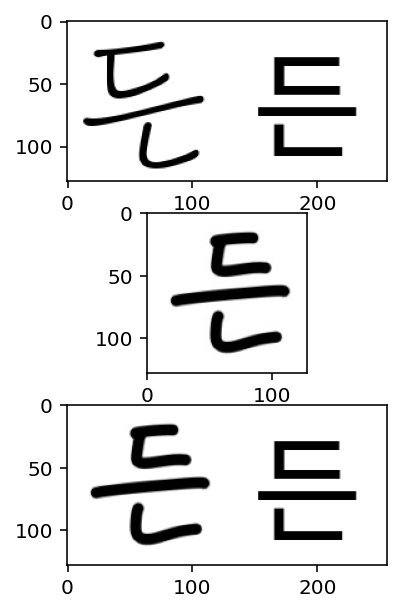

In [ ]:
OUTPUT_PATH2 = './handwritings/handwriting_imgreal_with_srcfont_mom'
os.makedirs(OUTPUT_PATH2, exist_ok=True)
src_imgs = sorted(glob.glob('./handwritings/handwriting_img_with_srcfont/*.png'), key=lambda x:int(os.path.basename(x)[2:6]))
tar_imgs = sorted(glob.glob(f'{save_pngs}/*.png'), key=lambda x:int(os.path.basename(x)[:-4]))
for srcfile, tarfile in zip(src_imgs, tar_imgs):
    img = plt.imread(srcfile)
    img2 = plt.imread(tarfile)
    basename = os.path.basename(srcfile)
    basename2 = os.path.basename(tarfile)
    assert int(basename[2:6]) + 1 == int(basename2[:-4])
    h, w = img2.shape[:-1]
    img2 = img2[:, (w-h)//2:-(w-h)//2]
    img2 = imresize(img2, (128, 128))
    img3 = img.copy()
    img3[:, :128] = img2[:, :, 0] / 255
    plt.imsave(os.path.join(OUTPUT_PATH2, basename), img3, cmap='gray')

plt.figure(figsize=(5,5))
plt.subplot(3, 1, 1)
plt.imshow(img, cmap='gray')
plt.subplot(3, 1, 2)
plt.imshow(img2, cmap='gray')
plt.subplot(3, 1, 3)
plt.imshow(img3, cmap='gray')
print(basename)

In [ ]:
len(os.listdir(save_pngs))

780

In [ ]:
plt.figure(figsize=(30, 30))
for idx, file in enumerate(glob.glob(f'{OUTPUT_PATH2}/*.png')[:16*16]):
    plt.subplot(16, 16, idx+1)
    plt.imshow(plt.imread(file), cmap='gray')
    plt.axis('off')
plt.tight_layout()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
len(os.listdir(OUTPUT_PATH2))

780

In [ ]:
from_dir = OUTPUT_PATH2
save_dir = './handwritings/handwriting_imgreal_dataset_mom'
os.makedirs(save_dir, exist_ok=True)
train_path = os.path.join(save_dir, "train.obj")
val_path = os.path.join(save_dir, "val.obj")

pickle_examples(from_dir, train_path=train_path, val_path=val_path, \
                train_val_split=0, with_charid=True)

all data num: 780
pickle with charid
0 imgs saved in val.obj, end
780 imgs saved in train.obj, end


In [ ]:
sample_size = 24
img_size = 128
fontid = 0
data_dir = save_dir
save_dir = './handwritings/fixed_imgreal_sample_mom'
os.makedirs(save_dir, exist_ok=True)

save_fixed_sample(sample_size, img_size, data_dir, save_dir, val=False, with_charid=True, resize_fix=90)

unpickled total 780 examples
train examples -> 780


In [ ]:
save_dir = './handwritings/fixed_imgreal_sample_mom'
fixed_source = torch.load(os.path.join(save_dir, 'fixed_source.pkl'))
fixed_target = torch.load(os.path.join(save_dir, 'fixed_target.pkl'))
fixed_label = torch.load(os.path.join(save_dir, 'fixed_label.pkl'))

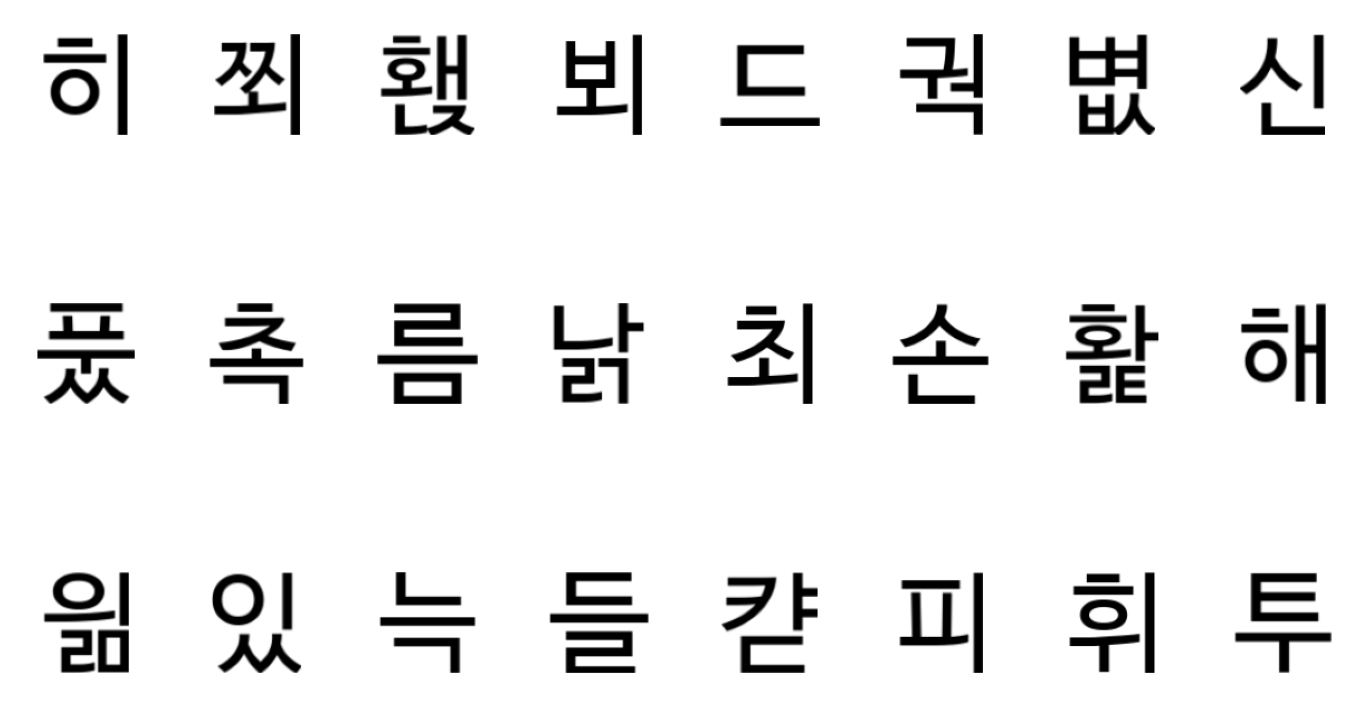

In [ ]:
plt.figure(figsize=(12, 7))
for idx, image in enumerate(fixed_source):
    plt.subplot(3, 8, idx+1)
    plt.imshow(image.squeeze(dim=0).cpu().numpy(), cmap='gray')
    plt.axis('off')
plt.show()

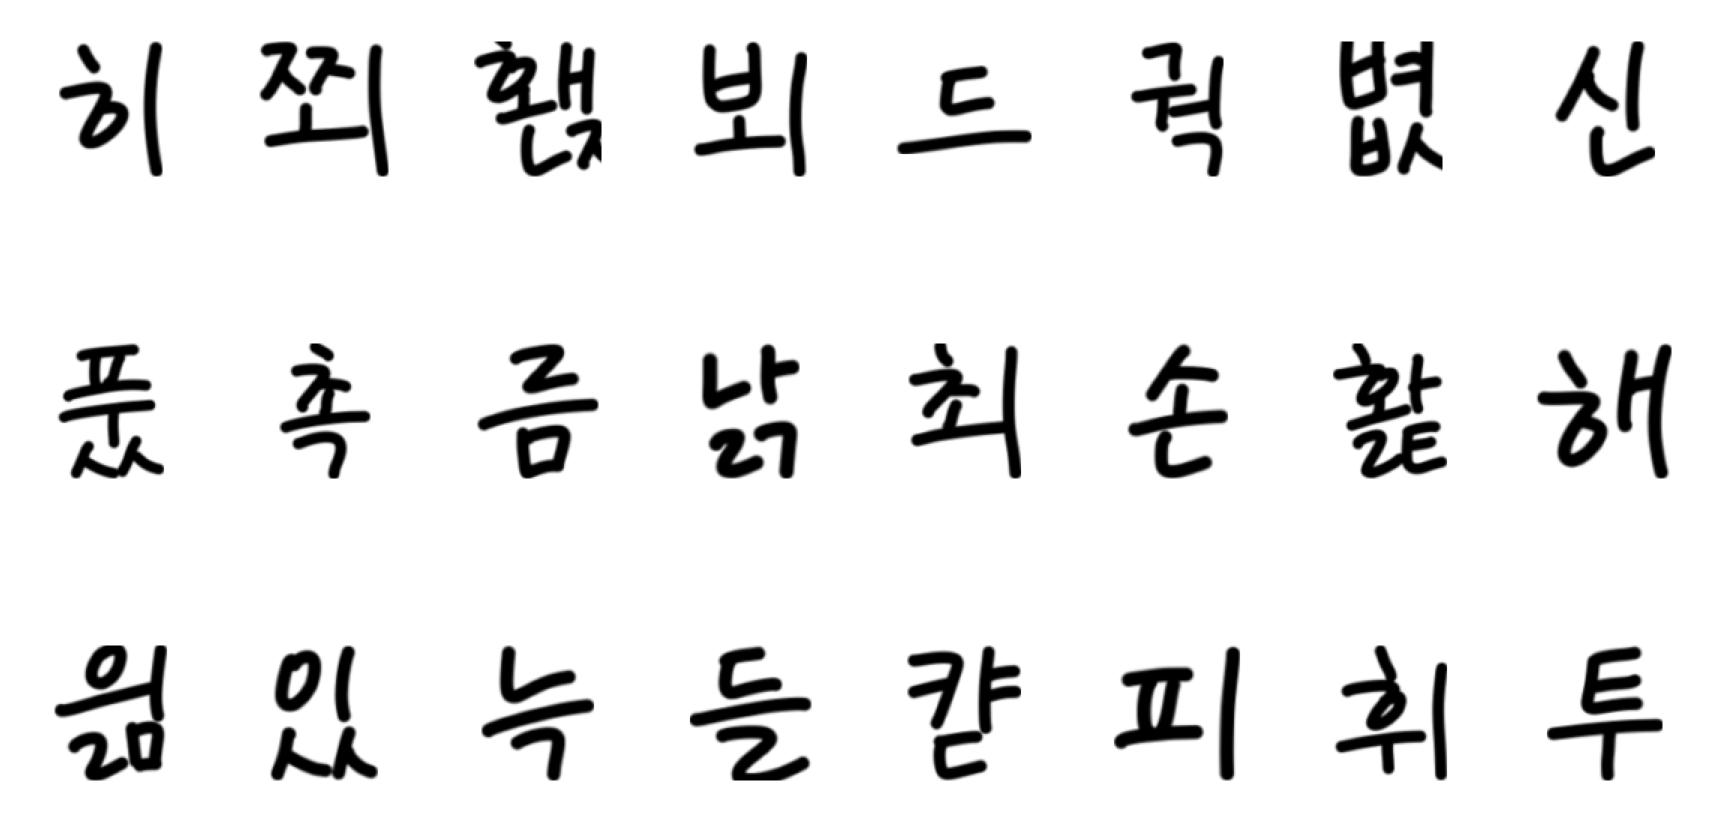

In [ ]:
plt.figure(figsize=(12, 7))
for idx, image in enumerate(fixed_target):
    plt.subplot(3, 8, idx+1)
    plt.imshow(image.reshape(128, 128).cpu().numpy(), cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
save_image(denorm_image(fixed_target.data), \
           os.path.join(save_dir, '0_Ground_truth_target.png'), \
           nrow=6, pad_value=255)

In [ ]:
# training
def train(max_epoch, schedule, data_dir, save_path, to_model_path, lr=0.001, \
          log_step=100, sample_step=350, fine_tune=False, flip_labels=False, \
          restore=None, from_model_path=False, GPU=True, freeze_encoder=False, 
          with_charid=False, resize_fix=90, gan_loss=True):
    # Fine Tuning coefficient
    if not fine_tune:
        L1_penalty, Lconst_penalty = 100, 15
    else:
        L1_penalty, Lconst_penalty = 500, 1000

    # Get Models
    En = Encoder()
    De = Decoder()
    D = Discriminator(category_num=FONTS_NUM)
    if GPU:
        En.cuda()
        De.cuda()
        D.cuda()
    
    # Use pre-trained Model
    # restore에 [encoder_path, decoder_path, discriminator_path] 형태로 인자 넣기
    if restore:
        encoder_path, decoder_path, discriminator_path = restore
        prev_epoch = int(encoder_path.split('-')[0])
        En.load_state_dict(torch.load(os.path.join(from_model_path, encoder_path)))
        De.load_state_dict(torch.load(os.path.join(from_model_path, decoder_path)))
        D.load_state_dict(torch.load(os.path.join(from_model_path, discriminator_path)))
        print("%d epoch trained model has restored" % prev_epoch)
    else:
        prev_epoch = 0
        print("New model training start")

        
    # L1 loss, binary real/fake loss, category loss, constant loss
    if GPU:
        l1_criterion = nn.L1Loss(size_average=True).cuda()
        bce_criterion = nn.BCEWithLogitsLoss(size_average=True).cuda()
        mse_criterion = nn.MSELoss(size_average=True).cuda()
    else:
        l1_criterion = nn.L1Loss(size_average=True)
        bce_criterion = nn.BCEWithLogitsLoss(size_average=True)
        mse_criterion = nn.MSELoss(size_average=True)


    # optimizer
        # optimizer
    if freeze_encoder:
        G_parameters = list(De.parameters())
    else:
        G_parameters = list(En.parameters()) + list(De.parameters())
    g_optimizer = torch.optim.Adam(G_parameters, betas=(0.5, 0.999))
    d_optimizer = torch.optim.Adam(D.parameters(), betas=(0.5, 0.999))
    
    # losses lists
    l1_losses, const_losses, category_losses, d_losses, g_losses = list(), list(), list(), list(), list()
    
    count = 0
    for epoch in range(max_epoch):
        if (epoch + 1) % schedule == 0:
            updated_lr = max(lr/2, 0.0002)
            for param_group in d_optimizer.param_groups:
                param_group['lr'] = updated_lr
            for param_group in g_optimizer.param_groups:
                param_group['lr'] = updated_lr
            if lr !=  updated_lr:
                print("decay learning rate from %.5f to %.5f" % (lr, updated_lr))
            lr = updated_lr

        train_batch_iter = data_provider.get_train_iter(BATCH_SIZE, with_charid=with_charid)   
        for i, batch in enumerate(train_batch_iter):
            if with_charid:
                font_ids, char_ids, batch_images = batch
            else:
                font_ids, batch_images = batch
            embedding_ids = font_ids
            
            if GPU:
                batch_images = batch_images.cuda()
            if flip_labels:
                np.random.shuffle(embedding_ids)

            # target / source images
            real_target = batch_images[:, 0, :, :].view([BATCH_SIZE, 1, IMG_SIZE, IMG_SIZE])
            real_source = batch_images[:, 1, :, :].view([BATCH_SIZE, 1, IMG_SIZE, IMG_SIZE])

            # centering
            for idx, (image_S, image_T) in enumerate(zip(real_source, real_target)):
                image_S = image_S.cpu().detach().numpy().reshape(IMG_SIZE, IMG_SIZE)
                image_S = centering_image(image_S, resize_fix=90)
                real_source[idx] = torch.tensor(image_S).view([1, IMG_SIZE, IMG_SIZE])
                image_T = image_T.cpu().detach().numpy().reshape(IMG_SIZE, IMG_SIZE)
                image_T = centering_image(image_T, resize_fix=resize_fix)
                real_target[idx] = torch.tensor(image_T).view([1, IMG_SIZE, IMG_SIZE])

            # generate fake image form source image
            fake_target, encoded_source, encoder_layers = Generator(real_source, En, De, embeddings, embedding_ids, GPU=GPU)

            real_TS = torch.cat([real_source, real_target], dim=1)
            fake_TS = torch.cat([real_source, fake_target], dim=1)

            # Scoring with Discriminator
            fake_score, fake_score_logit, fake_cat_logit = D(fake_TS)

            # Get encoded fake image to calculate constant loss
            encoded_fake = En(fake_target)[0]
            const_loss = Lconst_penalty * mse_criterion(encoded_source, encoded_fake)

            # category loss
            real_category = torch.from_numpy(np.eye(FONTS_NUM)[embedding_ids]).float()
            if GPU:
                real_category = real_category.cuda()
            fake_category_loss = bce_criterion(fake_cat_logit, real_category)

            # labels
            if GPU:
                one_labels = torch.ones([BATCH_SIZE, 1]).cuda()
                zero_labels = torch.zeros([BATCH_SIZE, 1]).cuda()
            else:
                one_labels = torch.ones([BATCH_SIZE, 1])
                zero_labels = torch.zeros([BATCH_SIZE, 1])

            # L1 loss between real and fake images
            l1_loss = L1_penalty * l1_criterion(real_target, fake_target)

            # cheat loss for generator to fool discriminator
            cheat_loss = bce_criterion(fake_score_logit, one_labels)

            # g_loss, d_loss
            g_loss = cheat_loss+ l1_loss + fake_category_loss + const_loss

            # train Generator
            En.zero_grad()
            De.zero_grad()

            g_loss.backward(retain_graph=True)
            g_optimizer.step()  

            fake_TS = torch.cat([real_source, fake_target.detach().clone()], dim=1)
            real_score, real_score_logit, real_cat_logit = D(real_TS)
            fake_score, fake_score_logit, fake_cat_logit = D(fake_TS.detach().clone())
            # binary loss for discriminator
            if gan_loss:
                real_binary_loss = bce_criterion(real_score_logit, one_labels)
                fake_binary_loss = bce_criterion(fake_score_logit, zero_labels)
                binary_loss = real_binary_loss + fake_binary_loss
            #category loss for discriminator
            fake_category_loss = bce_criterion(fake_cat_logit, real_category)
            real_category_loss = bce_criterion(real_cat_logit, real_category)
            category_loss = 0.5 * (real_category_loss + fake_category_loss)
            if gan_loss:
                d_loss = binary_loss + category_loss
            else:
                d_loss = category_loss
            # train Discriminator
            D.zero_grad()
            d_loss.backward(retain_graph=True)
            d_optimizer.step()          

            # loss data
            l1_losses.append(l1_loss.data)
            const_losses.append(const_loss.data)
            category_losses.append(category_loss.data)
            d_losses.append(d_loss.data)
            g_losses.append(g_loss.data)

            # logging
            if (i+1) % log_step == 0:
                time_ = time.time()
                time_stamp = datetime.datetime.fromtimestamp(time_).strftime('%H:%M:%S')
                log_format = 'Epoch [%d/%d], step [%d/%d], l1_loss: %.4f, d_loss: %.4f, g_loss: %.4f' % \
                             (int(prev_epoch)+epoch+1, int(prev_epoch)+max_epoch, i+1, total_batches, \
                              l1_loss.item(), d_loss.item(), g_loss.item())
                print(time_stamp, log_format)

            # save image
            if (i+1) % sample_step == 0:
                fixed_fake_images = Generator(fixed_source, En, De, embeddings, fixed_label, GPU=GPU)[0]
                save_image(denorm_image(fixed_fake_images.data), \
                           os.path.join(save_path, 'fake_samples-%d-%d.png' % (int(prev_epoch)+epoch+1, i+1)), \
                           nrow=8)

        if (epoch+1) % 1000 == 0:
            now = datetime.datetime.now()
            now_date = now.strftime("%m%d")
            now_time = now.strftime('%H:%M')
            torch.save(En.state_dict(), os.path.join(to_model_path, '%d-%s-%s-Encoder.pkl' \
                                                     % (int(prev_epoch)+epoch+1, now_date, now_time)))
            torch.save(De.state_dict(), os.path.join(to_model_path, '%d-%s-%s-Decoder.pkl' % \
                                                     (int(prev_epoch)+epoch+1, now_date, now_time)))
            torch.save(D.state_dict(), os.path.join(to_model_path, '%d-%s-%s-Discriminator.pkl' % \
                                                    (int(prev_epoch)+epoch+1, now_date, now_time)))

    # save model
    total_epoch = int(prev_epoch) + int(max_epoch)
    end = datetime.datetime.now()
    end_date = end.strftime("%m%d")
    end_time = end.strftime('%H:%M')
    torch.save(En.state_dict(), os.path.join(to_model_path, \
                                             '%d-%s-%s-Encoder.pkl' % (total_epoch, end_date, end_time)))
    torch.save(De.state_dict(), os.path.join(to_model_path, \
                                             '%d-%s-%s-Decoder.pkl' % (total_epoch, end_date, end_time)))
    torch.save(D.state_dict(), os.path.join(to_model_path, \
                                            '%d-%s-%s-Discriminator.pkl' % (total_epoch, end_date, end_time)))
    losses = [l1_losses, const_losses, category_losses, d_losses, g_losses]
    torch.save(losses, os.path.join(to_model_path, '%d-losses.pkl' % max_epoch))

    return l1_losses, const_losses, category_losses, d_losses, g_losses

In [ ]:
data_dir = './handwritings/handwriting_imgreal_dataset_mom'
embedding_dir = '.'

In [ ]:
from common.models import Encoder, Decoder, Discriminator, Generator
embeddings = torch.load(os.path.join(embedding_dir, 'EMBEDDINGS.pkl'))

In [ ]:
data_provider = TrainDataProvider(data_dir)
BATCH_SIZE = 16
total_batches = data_provider.compute_total_batch_num(BATCH_SIZE)
print("total batches:", total_batches)

unpickled total 780 examples
unpickled total 0 examples
train examples -> 780, val examples -> 0
total batches: 49


In [ ]:
batch_size = 16
import time
import datetime
IMG_SIZE = 128
EMBEDDING_DIM = 128
FONTS_NUM = 25
EMBEDDING_NUM = 100
save_path = './fixed_real_fake_mom_nongan/'
os.makedirs(save_path, exist_ok=True)
to_model_path = './model_checkpoint_mom/'
os.makedirs(to_model_path, exist_ok=True)
from_model_path = './model_checkpoint'
restore = ['200-0228-19_52-Encoder.pkl', '200-0228-19_52-Decoder.pkl', '200-0228-19_52-Discriminator.pkl']
max_epoch = 1500 #epoch
schedule = 500
lr = 0.0001
log_step = 10
sample_step = 10
resize_fix = 90

In [ ]:
losses = train(max_epoch=max_epoch, schedule=schedule, data_dir=data_dir, save_path=save_path,
               from_model_path=from_model_path, to_model_path=to_model_path, restore=restore,
               log_step=log_step, sample_step=sample_step, lr=lr, freeze_encoder=True,
               with_charid=True, resize_fix=resize_fix, gan_loss=False)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
04:28:41 Epoch [451/1700], step [20/49], l1_loss: 6.3676, d_loss: 0.0000, g_loss: 6.3695
04:28:42 Epoch [451/1700], step [30/49], l1_loss: 5.9613, d_loss: 0.0000, g_loss: 5.9623
04:28:43 Epoch [451/1700], step [40/49], l1_loss: 16.0542, d_loss: 0.0000, g_loss: 16.0558
04:28:46 Epoch [452/1700], step [10/49], l1_loss: 6.7023, d_loss: 0.0000, g_loss: 6.7036
04:28:48 Epoch [452/1700], step [20/49], l1_loss: 6.8556, d_loss: 0.0000, g_loss: 6.8570
04:28:49 Epoch [452/1700], step [30/49], l1_loss: 7.9819, d_loss: 0.0000, g_loss: 7.9835
04:28:50 Epoch [452/1700], step [40/49], l1_loss: 9.3900, d_loss: 0.0000, g_loss: 9.3918
04:28:53 Epoch [453/1700], step [10/49], l1_loss: 6.9162, d_loss: 0.0000, g_loss: 6.9172
04:28:55 Epoch [453/1700], step [20/49], l1_loss: 6.9598, d_loss: 0.0000, g_loss: 6.9612
04:28:56 Epoch [453/1700], step [30/49], l1_loss: 8.5075, d_loss: 0.0000, g_loss: 8.5089
04:28:57 Epoch [453/1700], step [40/49], l1_loss: 5.3743, d_loss: 0.0000

In [ ]:
####################################################### run this after training #######################################################

In [ ]:
from google.colab import drive
import os

drive.mount('/content/gdrive')
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/')
!pip install scipy==1.1.0

import sys, glob, io, os
import numpy as np
from PIL import ImageFont
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import torch
import torch.nn as nn
from torchvision.utils import save_image

from get_data.font2img import draw_single_char, draw_example
from get_data.package import pickle_examples
from common.utils import centering_image, denorm_image
from common.dataset import TrainDataProvider, save_fixed_sample
from common.function import init_embedding

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#### /content/gdrive/MyDrive/Colab Notebooks/model_checkpoint_colleage/2200-0415-11:19-Decoder.pkl ####

In [ ]:
embedding_dir = '.'
from common.models import Encoder, Decoder, Discriminator, Generator
embeddings = torch.load(os.path.join(embedding_dir, 'EMBEDDINGS.pkl'))

In [ ]:
restore = ['1700-0427-06:54-Encoder.pkl', # path change after training
 '1700-0427-06:54-Decoder.pkl',
 '1700-0427-06:54-Discriminator.pkl']
with torch.no_grad():
    En = Encoder().cuda()
    De = Decoder().cuda()
    D = Discriminator(category_num=25).cuda()
    from_model_path = 'model_checkpoint_mom'   # path change after training
    encoder_path, decoder_path, discriminator_path = restore
    prev_epoch = int(encoder_path.split('-')[0])
    En.load_state_dict(torch.load(os.path.join(from_model_path, encoder_path)))
    De.load_state_dict(torch.load(os.path.join(from_model_path, decoder_path)))
    D.load_state_dict(torch.load(os.path.join(from_model_path, discriminator_path)))
    print("%d epoch trained model has restored" % prev_epoch)

1700 epoch trained model has restored


In [ ]:
# no need to run
fake_target, encoded_source, _ = Generator(fixed_source, En, De, embeddings, \
                                          fixed_label, GPU=True, encode_layers=True)

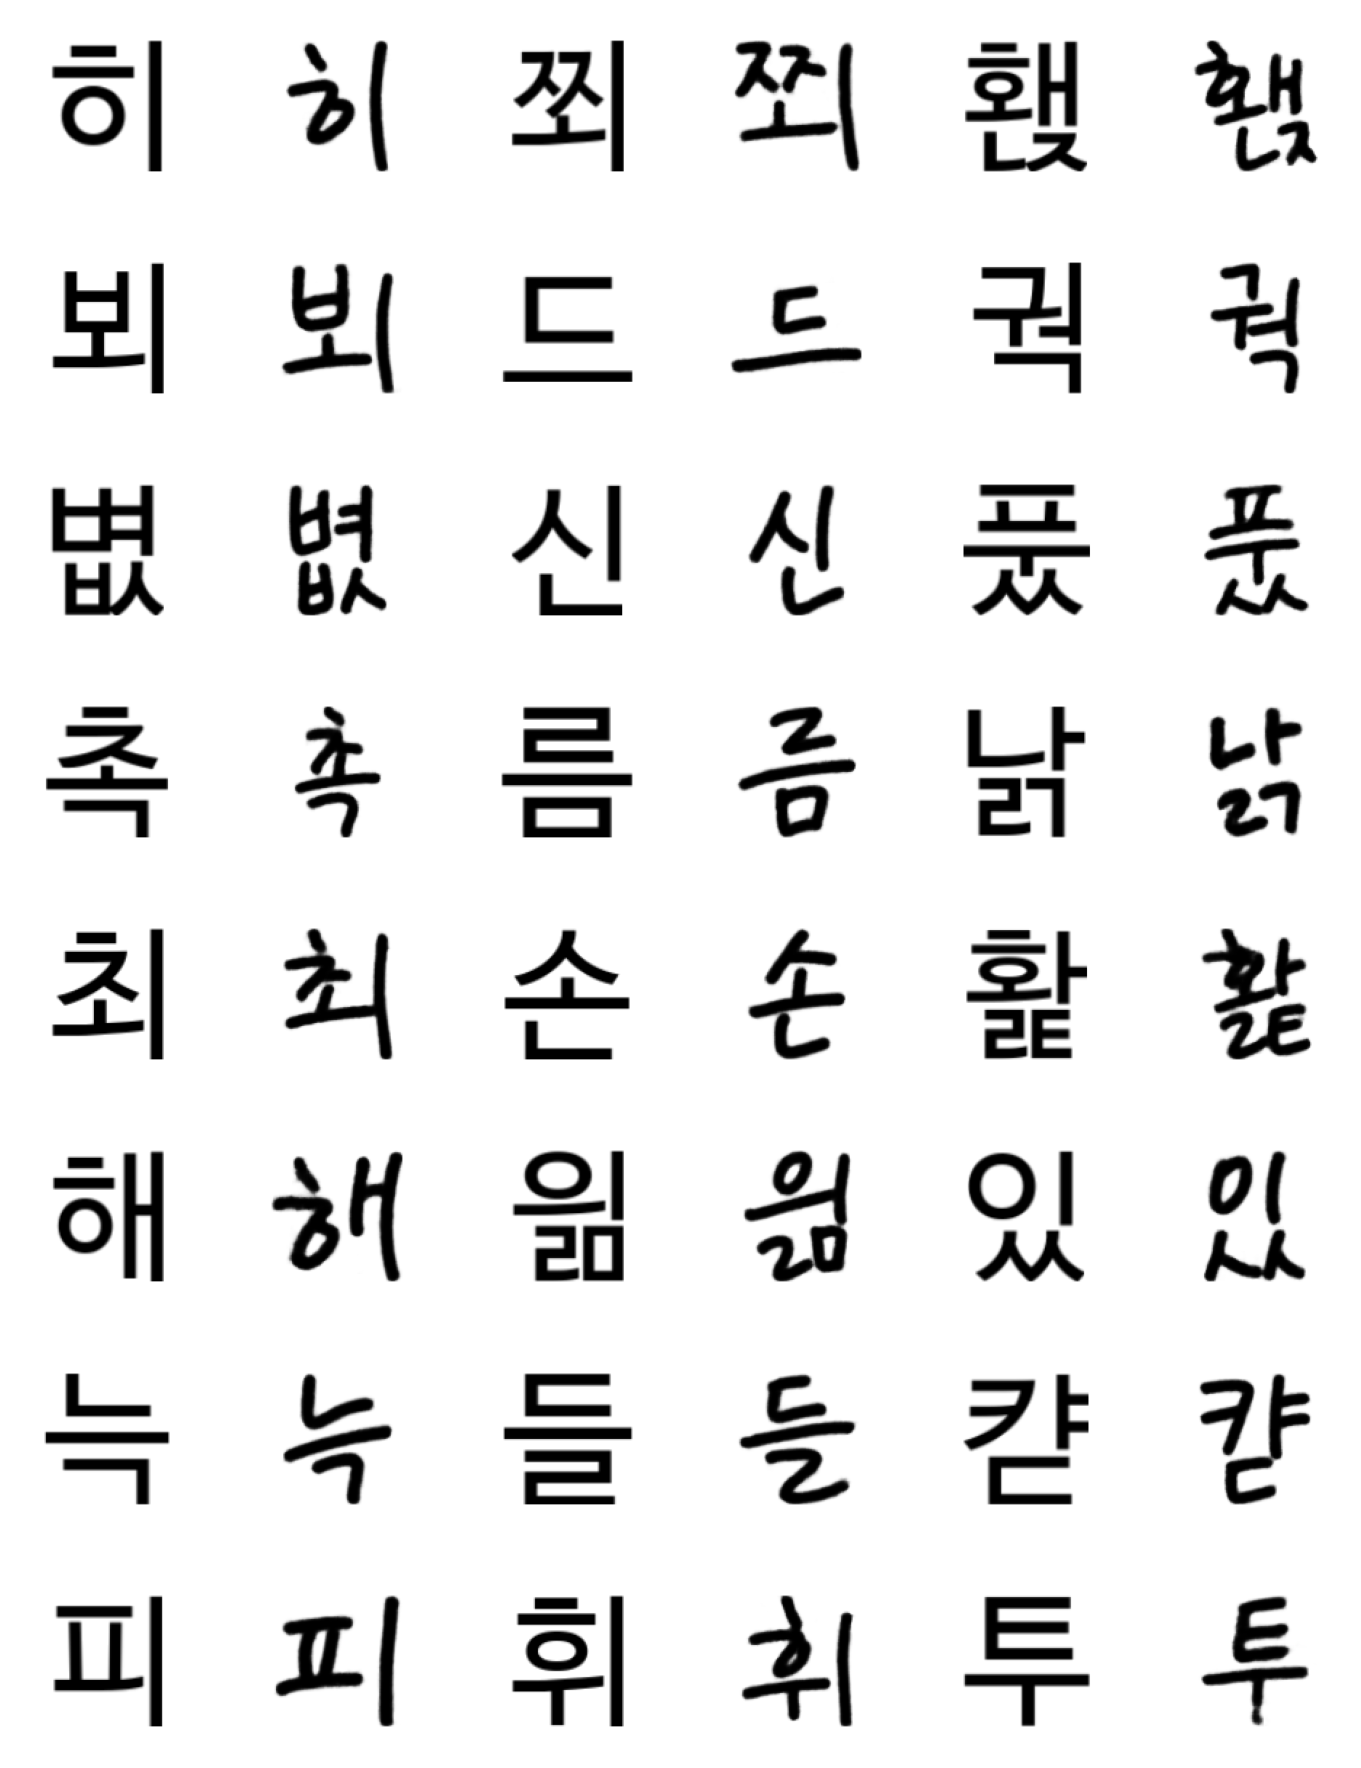

In [ ]:
# no need to run
plt.figure(figsize=(12, 16))
for idx, (image_R, image_F) in enumerate(zip(fixed_source, fake_target)):
    plt.subplot(8, 6, 2*idx+1)
    plt.imshow(image_R.cpu().detach().numpy().reshape(128, 128), cmap='gray')
    plt.axis('off')
    
    plt.subplot(8, 6, 2*idx+2)
    plt.imshow(image_F.cpu().detach().numpy().reshape(128, 128), cmap='gray')
    plt.axis('off')

plt.savefig('mom_1500epoch.png', dpi=100)
plt.show()

In [ ]:
chars = '가각갂갃간갅갆갇갈갉갊갋갌갍갎갏감갑값갓갔강갖갗갘같갚갛개객갞갟갠갡갢갣갤갥갦갧갨갩갪갫갬갭갮갯갰갱갲갳갴갵갶갷갸갹갺갻갼갽갾갿걀걁걂걃걄걅걆걇걈걉걊걋걌걍걎걏걐걑걒걓걔걕걖걗걘걙걚걛걜걝걞걟걠걡걢걣걤걥걦걧걨걩걪걫걬걭걮걯거걱걲걳건걵걶걷걸걹걺걻걼걽걾걿검겁겂것겄겅겆겇겈겉겊겋게겍겎겏겐겑겒겓겔겕겖겗겘겙겚겛겜겝겞겟겠겡겢겣겤겥겦겧겨격겪겫견겭겮겯결겱겲겳겴겵겶겷겸겹겺겻겼경겾겿곀곁곂곃계곅곆곇곈곉곊곋곌곍곎곏곐곑곒곓곔곕곖곗곘곙곚곛곜곝곞곟고곡곢곣곤곥곦곧골곩곪곫곬곭곮곯곰곱곲곳곴공곶곷곸곹곺곻과곽곾곿관괁괂괃괄괅괆괇괈괉괊괋괌괍괎괏괐광괒괓괔괕괖괗괘괙괚괛괜괝괞괟괠괡괢괣괤괥괦괧괨괩괪괫괬괭괮괯괰괱괲괳괴괵괶괷괸괹괺괻괼괽괾괿굀굁굂굃굄굅굆굇굈굉굊굋굌굍굎굏교굑굒굓굔굕굖굗굘굙굚굛굜굝굞굟굠굡굢굣굤굥굦굧굨굩굪굫구국굮굯군굱굲굳굴굵굶굷굸굹굺굻굼굽굾굿궀궁궂궃궄궅궆궇궈궉궊궋권궍궎궏궐궑궒궓궔궕궖궗궘궙궚궛궜궝궞궟궠궡궢궣궤궥궦궧궨궩궪궫궬궭궮궯궰궱궲궳궴궵궶궷궸궹궺궻궼궽궾궿귀귁귂귃귄귅귆귇귈귉귊귋귌귍귎귏귐귑귒귓귔귕귖귗귘귙귚귛규귝귞귟균귡귢귣귤귥귦귧귨귩귪귫귬귭귮귯귰귱귲귳귴귵귶귷그극귺귻근귽귾귿글긁긂긃긄긅긆긇금급긊긋긌긍긎긏긐긑긒긓긔긕긖긗긘긙긚긛긜긝긞긟긠긡긢긣긤긥긦긧긨긩긪긫긬긭긮긯기긱긲긳긴긵긶긷길긹긺긻긼긽긾긿김깁깂깃깄깅깆깇깈깉깊깋까깍깎깏깐깑깒깓깔깕깖깗깘깙깚깛깜깝깞깟깠깡깢깣깤깥깦깧깨깩깪깫깬깭깮깯깰깱깲깳깴깵깶깷깸깹깺깻깼깽깾깿꺀꺁꺂꺃꺄꺅꺆꺇꺈꺉꺊꺋꺌꺍꺎꺏꺐꺑꺒꺓꺔꺕꺖꺗꺘꺙꺚꺛꺜꺝꺞꺟꺠꺡꺢꺣꺤꺥꺦꺧꺨꺩꺪꺫꺬꺭꺮꺯꺰꺱꺲꺳꺴꺵꺶꺷꺸꺹꺺꺻꺼꺽꺾꺿껀껁껂껃껄껅껆껇껈껉껊껋껌껍껎껏껐껑껒껓껔껕껖껗께껙껚껛껜껝껞껟껠껡껢껣껤껥껦껧껨껩껪껫껬껭껮껯껰껱껲껳껴껵껶껷껸껹껺껻껼껽껾껿꼀꼁꼂꼃꼄꼅꼆꼇꼈꼉꼊꼋꼌꼍꼎꼏꼐꼑꼒꼓꼔꼕꼖꼗꼘꼙꼚꼛꼜꼝꼞꼟꼠꼡꼢꼣꼤꼥꼦꼧꼨꼩꼪꼫꼬꼭꼮꼯꼰꼱꼲꼳꼴꼵꼶꼷꼸꼹꼺꼻꼼꼽꼾꼿꽀꽁꽂꽃꽄꽅꽆꽇꽈꽉꽊꽋꽌꽍꽎꽏꽐꽑꽒꽓꽔꽕꽖꽗꽘꽙꽚꽛꽜꽝꽞꽟꽠꽡꽢꽣꽤꽥꽦꽧꽨꽩꽪꽫꽬꽭꽮꽯꽰꽱꽲꽳꽴꽵꽶꽷꽸꽹꽺꽻꽼꽽꽾꽿꾀꾁꾂꾃꾄꾅꾆꾇꾈꾉꾊꾋꾌꾍꾎꾏꾐꾑꾒꾓꾔꾕꾖꾗꾘꾙꾚꾛꾜꾝꾞꾟꾠꾡꾢꾣꾤꾥꾦꾧꾨꾩꾪꾫꾬꾭꾮꾯꾰꾱꾲꾳꾴꾵꾶꾷꾸꾹꾺꾻꾼꾽꾾꾿꿀꿁꿂꿃꿄꿅꿆꿇꿈꿉꿊꿋꿌꿍꿎꿏꿐꿑꿒꿓꿔꿕꿖꿗꿘꿙꿚꿛꿜꿝꿞꿟꿠꿡꿢꿣꿤꿥꿦꿧꿨꿩꿪꿫꿬꿭꿮꿯꿰꿱꿲꿳꿴꿵꿶꿷꿸꿹꿺꿻꿼꿽꿾꿿뀀뀁뀂뀃뀄뀅뀆뀇뀈뀉뀊뀋뀌뀍뀎뀏뀐뀑뀒뀓뀔뀕뀖뀗뀘뀙뀚뀛뀜뀝뀞뀟뀠뀡뀢뀣뀤뀥뀦뀧뀨뀩뀪뀫뀬뀭뀮뀯뀰뀱뀲뀳뀴뀵뀶뀷뀸뀹뀺뀻뀼뀽뀾뀿끀끁끂끃끄끅끆끇끈끉끊끋끌끍끎끏끐끑끒끓끔끕끖끗끘끙끚끛끜끝끞끟끠끡끢끣끤끥끦끧끨끩끪끫끬끭끮끯끰끱끲끳끴끵끶끷끸끹끺끻끼끽끾끿낀낁낂낃낄낅낆낇낈낉낊낋낌낍낎낏낐낑낒낓낔낕낖낗나낙낚낛난낝낞낟날낡낢낣낤낥낦낧남납낪낫났낭낮낯낰낱낲낳내낵낶낷낸낹낺낻낼낽낾낿냀냁냂냃냄냅냆냇냈냉냊냋냌냍냎냏냐냑냒냓냔냕냖냗냘냙냚냛냜냝냞냟냠냡냢냣냤냥냦냧냨냩냪냫냬냭냮냯냰냱냲냳냴냵냶냷냸냹냺냻냼냽냾냿넀넁넂넃넄넅넆넇너넉넊넋넌넍넎넏널넑넒넓넔넕넖넗넘넙넚넛넜넝넞넟넠넡넢넣네넥넦넧넨넩넪넫넬넭넮넯넰넱넲넳넴넵넶넷넸넹넺넻넼넽넾넿녀녁녂녃년녅녆녇녈녉녊녋녌녍녎녏념녑녒녓녔녕녖녗녘녙녚녛녜녝녞녟녠녡녢녣녤녥녦녧녨녩녪녫녬녭녮녯녰녱녲녳녴녵녶녷노녹녺녻논녽녾녿놀놁놂놃놄놅놆놇놈놉놊놋놌농놎놏놐놑높놓놔놕놖놗놘놙놚놛놜놝놞놟놠놡놢놣놤놥놦놧놨놩놪놫놬놭놮놯놰놱놲놳놴놵놶놷놸놹놺놻놼놽놾놿뇀뇁뇂뇃뇄뇅뇆뇇뇈뇉뇊뇋뇌뇍뇎뇏뇐뇑뇒뇓뇔뇕뇖뇗뇘뇙뇚뇛뇜뇝뇞뇟뇠뇡뇢뇣뇤뇥뇦뇧뇨뇩뇪뇫뇬뇭뇮뇯뇰뇱뇲뇳뇴뇵뇶뇷뇸뇹뇺뇻뇼뇽뇾뇿눀눁눂눃누눅눆눇눈눉눊눋눌눍눎눏눐눑눒눓눔눕눖눗눘눙눚눛눜눝눞눟눠눡눢눣눤눥눦눧눨눩눪눫눬눭눮눯눰눱눲눳눴눵눶눷눸눹눺눻눼눽눾눿뉀뉁뉂뉃뉄뉅뉆뉇뉈뉉뉊뉋뉌뉍뉎뉏뉐뉑뉒뉓뉔뉕뉖뉗뉘뉙뉚뉛뉜뉝뉞뉟뉠뉡뉢뉣뉤뉥뉦뉧뉨뉩뉪뉫뉬뉭뉮뉯뉰뉱뉲뉳뉴뉵뉶뉷뉸뉹뉺뉻뉼뉽뉾뉿늀늁늂늃늄늅늆늇늈늉늊늋늌늍늎늏느늑늒늓는늕늖늗늘늙늚늛늜늝늞늟늠늡늢늣늤능늦늧늨늩늪늫늬늭늮늯늰늱늲늳늴늵늶늷늸늹늺늻늼늽늾늿닀닁닂닃닄닅닆닇니닉닊닋닌닍닎닏닐닑닒닓닔닕닖닗님닙닚닛닜닝닞닟닠닡닢닣다닥닦닧단닩닪닫달닭닮닯닰닱닲닳담답닶닷닸당닺닻닼닽닾닿대댁댂댃댄댅댆댇댈댉댊댋댌댍댎댏댐댑댒댓댔댕댖댗댘댙댚댛댜댝댞댟댠댡댢댣댤댥댦댧댨댩댪댫댬댭댮댯댰댱댲댳댴댵댶댷댸댹댺댻댼댽댾댿덀덁덂덃덄덅덆덇덈덉덊덋덌덍덎덏덐덑덒덓더덕덖덗던덙덚덛덜덝덞덟덠덡덢덣덤덥덦덧덨덩덪덫덬덭덮덯데덱덲덳덴덵덶덷델덹덺덻덼덽덾덿뎀뎁뎂뎃뎄뎅뎆뎇뎈뎉뎊뎋뎌뎍뎎뎏뎐뎑뎒뎓뎔뎕뎖뎗뎘뎙뎚뎛뎜뎝뎞뎟뎠뎡뎢뎣뎤뎥뎦뎧뎨뎩뎪뎫뎬뎭뎮뎯뎰뎱뎲뎳뎴뎵뎶뎷뎸뎹뎺뎻뎼뎽뎾뎿돀돁돂돃도독돆돇돈돉돊돋돌돍돎돏돐돑돒돓돔돕돖돗돘동돚돛돜돝돞돟돠돡돢돣돤돥돦돧돨돩돪돫돬돭돮돯돰돱돲돳돴돵돶돷돸돹돺돻돼돽돾돿됀됁됂됃됄됅됆됇됈됉됊됋됌됍됎됏됐됑됒됓됔됕됖됗되됙됚됛된됝됞됟될됡됢됣됤됥됦됧됨됩됪됫됬됭됮됯됰됱됲됳됴됵됶됷됸됹됺됻됼됽됾됿둀둁둂둃둄둅둆둇둈둉둊둋둌둍둎둏두둑둒둓둔둕둖둗둘둙둚둛둜둝둞둟둠둡둢둣둤둥둦둧둨둩둪둫둬둭둮둯둰둱둲둳둴둵둶둷둸둹둺둻둼둽둾둿뒀뒁뒂뒃뒄뒅뒆뒇뒈뒉뒊뒋뒌뒍뒎뒏뒐뒑뒒뒓뒔뒕뒖뒗뒘뒙뒚뒛뒜뒝뒞뒟뒠뒡뒢뒣뒤뒥뒦뒧뒨뒩뒪뒫뒬뒭뒮뒯뒰뒱뒲뒳뒴뒵뒶뒷뒸뒹뒺뒻뒼뒽뒾뒿듀듁듂듃듄듅듆듇듈듉듊듋듌듍듎듏듐듑듒듓듔듕듖듗듘듙듚듛드득듞듟든듡듢듣들듥듦듧듨듩듪듫듬듭듮듯듰등듲듳듴듵듶듷듸듹듺듻듼듽듾듿딀딁딂딃딄딅딆딇딈딉딊딋딌딍딎딏딐딑딒딓디딕딖딗딘딙딚딛딜딝딞딟딠딡딢딣딤딥딦딧딨딩딪딫딬딭딮딯따딱딲딳딴딵딶딷딸딹딺딻딼딽딾딿땀땁땂땃땄땅땆땇땈땉땊땋때땍땎땏땐땑땒땓땔땕땖땗땘땙땚땛땜땝땞땟땠땡땢땣땤땥땦땧땨땩땪땫땬땭땮땯땰땱땲땳땴땵땶땷땸땹땺땻땼땽땾땿떀떁떂떃떄떅떆떇떈떉떊떋떌떍떎떏떐떑떒떓떔떕떖떗떘떙떚떛떜떝떞떟떠떡떢떣떤떥떦떧떨떩떪떫떬떭떮떯떰떱떲떳떴떵떶떷떸떹떺떻떼떽떾떿뗀뗁뗂뗃뗄뗅뗆뗇뗈뗉뗊뗋뗌뗍뗎뗏뗐뗑뗒뗓뗔뗕뗖뗗뗘뗙뗚뗛뗜뗝뗞뗟뗠뗡뗢뗣뗤뗥뗦뗧뗨뗩뗪뗫뗬뗭뗮뗯뗰뗱뗲뗳뗴뗵뗶뗷뗸뗹뗺뗻뗼뗽뗾뗿똀똁똂똃똄똅똆똇똈똉똊똋똌똍똎똏또똑똒똓똔똕똖똗똘똙똚똛똜똝똞똟똠똡똢똣똤똥똦똧똨똩똪똫똬똭똮똯똰똱똲똳똴똵똶똷똸똹똺똻똼똽똾똿뙀뙁뙂뙃뙄뙅뙆뙇뙈뙉뙊뙋뙌뙍뙎뙏뙐뙑뙒뙓뙔뙕뙖뙗뙘뙙뙚뙛뙜뙝뙞뙟뙠뙡뙢뙣뙤뙥뙦뙧뙨뙩뙪뙫뙬뙭뙮뙯뙰뙱뙲뙳뙴뙵뙶뙷뙸뙹뙺뙻뙼뙽뙾뙿뚀뚁뚂뚃뚄뚅뚆뚇뚈뚉뚊뚋뚌뚍뚎뚏뚐뚑뚒뚓뚔뚕뚖뚗뚘뚙뚚뚛뚜뚝뚞뚟뚠뚡뚢뚣뚤뚥뚦뚧뚨뚩뚪뚫뚬뚭뚮뚯뚰뚱뚲뚳뚴뚵뚶뚷뚸뚹뚺뚻뚼뚽뚾뚿뛀뛁뛂뛃뛄뛅뛆뛇뛈뛉뛊뛋뛌뛍뛎뛏뛐뛑뛒뛓뛔뛕뛖뛗뛘뛙뛚뛛뛜뛝뛞뛟뛠뛡뛢뛣뛤뛥뛦뛧뛨뛩뛪뛫뛬뛭뛮뛯뛰뛱뛲뛳뛴뛵뛶뛷뛸뛹뛺뛻뛼뛽뛾뛿뜀뜁뜂뜃뜄뜅뜆뜇뜈뜉뜊뜋뜌뜍뜎뜏뜐뜑뜒뜓뜔뜕뜖뜗뜘뜙뜚뜛뜜뜝뜞뜟뜠뜡뜢뜣뜤뜥뜦뜧뜨뜩뜪뜫뜬뜭뜮뜯뜰뜱뜲뜳뜴뜵뜶뜷뜸뜹뜺뜻뜼뜽뜾뜿띀띁띂띃띄띅띆띇띈띉띊띋띌띍띎띏띐띑띒띓띔띕띖띗띘띙띚띛띜띝띞띟띠띡띢띣띤띥띦띧띨띩띪띫띬띭띮띯띰띱띲띳띴띵띶띷띸띹띺띻라락띾띿란랁랂랃랄랅랆랇랈랉랊랋람랍랎랏랐랑랒랓랔랕랖랗래랙랚랛랜랝랞랟랠랡랢랣랤랥랦랧램랩랪랫랬랭랮랯랰랱랲랳랴략랶랷랸랹랺랻랼랽랾랿럀럁럂럃럄럅럆럇럈량럊럋럌럍럎럏럐럑럒럓럔럕럖럗럘럙럚럛럜럝럞럟럠럡럢럣럤럥럦럧럨럩럪럫러럭럮럯런럱럲럳럴럵럶럷럸럹럺럻럼럽럾럿렀렁렂렃렄렅렆렇레렉렊렋렌렍렎렏렐렑렒렓렔렕렖렗렘렙렚렛렜렝렞렟렠렡렢렣려력렦렧련렩렪렫렬렭렮렯렰렱렲렳렴렵렶렷렸령렺렻렼렽렾렿례롁롂롃롄롅롆롇롈롉롊롋롌롍롎롏롐롑롒롓롔롕롖롗롘롙롚롛로록롞롟론롡롢롣롤롥롦롧롨롩롪롫롬롭롮롯롰롱롲롳롴롵롶롷롸롹롺롻롼롽롾롿뢀뢁뢂뢃뢄뢅뢆뢇뢈뢉뢊뢋뢌뢍뢎뢏뢐뢑뢒뢓뢔뢕뢖뢗뢘뢙뢚뢛뢜뢝뢞뢟뢠뢡뢢뢣뢤뢥뢦뢧뢨뢩뢪뢫뢬뢭뢮뢯뢰뢱뢲뢳뢴뢵뢶뢷뢸뢹뢺뢻뢼뢽뢾뢿룀룁룂룃룄룅룆룇룈룉룊룋료룍룎룏룐룑룒룓룔룕룖룗룘룙룚룛룜룝룞룟룠룡룢룣룤룥룦룧루룩룪룫룬룭룮룯룰룱룲룳룴룵룶룷룸룹룺룻룼룽룾룿뤀뤁뤂뤃뤄뤅뤆뤇뤈뤉뤊뤋뤌뤍뤎뤏뤐뤑뤒뤓뤔뤕뤖뤗뤘뤙뤚뤛뤜뤝뤞뤟뤠뤡뤢뤣뤤뤥뤦뤧뤨뤩뤪뤫뤬뤭뤮뤯뤰뤱뤲뤳뤴뤵뤶뤷뤸뤹뤺뤻뤼뤽뤾뤿륀륁륂륃륄륅륆륇륈륉륊륋륌륍륎륏륐륑륒륓륔륕륖륗류륙륚륛륜륝륞륟률륡륢륣륤륥륦륧륨륩륪륫륬륭륮륯륰륱륲륳르륵륶륷른륹륺륻를륽륾륿릀릁릂릃름릅릆릇릈릉릊릋릌릍릎릏릐릑릒릓릔릕릖릗릘릙릚릛릜릝릞릟릠릡릢릣릤릥릦릧릨릩릪릫리릭릮릯린릱릲릳릴릵릶릷릸릹릺릻림립릾릿맀링맂맃맄맅맆맇마막맊맋만맍많맏말맑맒맓맔맕맖맗맘맙맚맛맜망맞맟맠맡맢맣매맥맦맧맨맩맪맫맬맭맮맯맰맱맲맳맴맵맶맷맸맹맺맻맼맽맾맿먀먁먂먃먄먅먆먇먈먉먊먋먌먍먎먏먐먑먒먓먔먕먖먗먘먙먚먛먜먝먞먟먠먡먢먣먤먥먦먧먨먩먪먫먬먭먮먯먰먱먲먳먴먵먶먷머먹먺먻먼먽먾먿멀멁멂멃멄멅멆멇멈멉멊멋멌멍멎멏멐멑멒멓메멕멖멗멘멙멚멛멜멝멞멟멠멡멢멣멤멥멦멧멨멩멪멫멬멭멮멯며멱멲멳면멵멶멷멸멹멺멻멼멽멾멿몀몁몂몃몄명몆몇몈몉몊몋몌몍몎몏몐몑몒몓몔몕몖몗몘몙몚몛몜몝몞몟몠몡몢몣몤몥몦몧모목몪몫몬몭몮몯몰몱몲몳몴몵몶몷몸몹몺못몼몽몾몿뫀뫁뫂뫃뫄뫅뫆뫇뫈뫉뫊뫋뫌뫍뫎뫏뫐뫑뫒뫓뫔뫕뫖뫗뫘뫙뫚뫛뫜뫝뫞뫟뫠뫡뫢뫣뫤뫥뫦뫧뫨뫩뫪뫫뫬뫭뫮뫯뫰뫱뫲뫳뫴뫵뫶뫷뫸뫹뫺뫻뫼뫽뫾뫿묀묁묂묃묄묅묆묇묈묉묊묋묌묍묎묏묐묑묒묓묔묕묖묗묘묙묚묛묜묝묞묟묠묡묢묣묤묥묦묧묨묩묪묫묬묭묮묯묰묱묲묳무묵묶묷문묹묺묻물묽묾묿뭀뭁뭂뭃뭄뭅뭆뭇뭈뭉뭊뭋뭌뭍뭎뭏뭐뭑뭒뭓뭔뭕뭖뭗뭘뭙뭚뭛뭜뭝뭞뭟뭠뭡뭢뭣뭤뭥뭦뭧뭨뭩뭪뭫뭬뭭뭮뭯뭰뭱뭲뭳뭴뭵뭶뭷뭸뭹뭺뭻뭼뭽뭾뭿뮀뮁뮂뮃뮄뮅뮆뮇뮈뮉뮊뮋뮌뮍뮎뮏뮐뮑뮒뮓뮔뮕뮖뮗뮘뮙뮚뮛뮜뮝뮞뮟뮠뮡뮢뮣뮤뮥뮦뮧뮨뮩뮪뮫뮬뮭뮮뮯뮰뮱뮲뮳뮴뮵뮶뮷뮸뮹뮺뮻뮼뮽뮾뮿므믁믂믃믄믅믆믇믈믉믊믋믌믍믎믏믐믑믒믓믔믕믖믗믘믙믚믛믜믝믞믟믠믡믢믣믤믥믦믧믨믩믪믫믬믭믮믯믰믱믲믳믴믵믶믷미믹믺믻민믽믾믿밀밁밂밃밄밅밆밇밈밉밊밋밌밍밎및밐밑밒밓바박밖밗반밙밚받발밝밞밟밠밡밢밣밤밥밦밧밨방밪밫밬밭밮밯배백밲밳밴밵밶밷밸밹밺밻밼밽밾밿뱀뱁뱂뱃뱄뱅뱆뱇뱈뱉뱊뱋뱌뱍뱎뱏뱐뱑뱒뱓뱔뱕뱖뱗뱘뱙뱚뱛뱜뱝뱞뱟뱠뱡뱢뱣뱤뱥뱦뱧뱨뱩뱪뱫뱬뱭뱮뱯뱰뱱뱲뱳뱴뱵뱶뱷뱸뱹뱺뱻뱼뱽뱾뱿벀벁벂벃버벅벆벇번벉벊벋벌벍벎벏벐벑벒벓범법벖벗벘벙벚벛벜벝벞벟베벡벢벣벤벥벦벧벨벩벪벫벬벭벮벯벰벱벲벳벴벵벶벷벸벹벺벻벼벽벾벿변볁볂볃별볅볆볇볈볉볊볋볌볍볎볏볐병볒볓볔볕볖볗볘볙볚볛볜볝볞볟볠볡볢볣볤볥볦볧볨볩볪볫볬볭볮볯볰볱볲볳보복볶볷본볹볺볻볼볽볾볿봀봁봂봃봄봅봆봇봈봉봊봋봌봍봎봏봐봑봒봓봔봕봖봗봘봙봚봛봜봝봞봟봠봡봢봣봤봥봦봧봨봩봪봫봬봭봮봯봰봱봲봳봴봵봶봷봸봹봺봻봼봽봾봿뵀뵁뵂뵃뵄뵅뵆뵇뵈뵉뵊뵋뵌뵍뵎뵏뵐뵑뵒뵓뵔뵕뵖뵗뵘뵙뵚뵛뵜뵝뵞뵟뵠뵡뵢뵣뵤뵥뵦뵧뵨뵩뵪뵫뵬뵭뵮뵯뵰뵱뵲뵳뵴뵵뵶뵷뵸뵹뵺뵻뵼뵽뵾뵿부북붂붃분붅붆붇불붉붊붋붌붍붎붏붐붑붒붓붔붕붖붗붘붙붚붛붜붝붞붟붠붡붢붣붤붥붦붧붨붩붪붫붬붭붮붯붰붱붲붳붴붵붶붷붸붹붺붻붼붽붾붿뷀뷁뷂뷃뷄뷅뷆뷇뷈뷉뷊뷋뷌뷍뷎뷏뷐뷑뷒뷓뷔뷕뷖뷗뷘뷙뷚뷛뷜뷝뷞뷟뷠뷡뷢뷣뷤뷥뷦뷧뷨뷩뷪뷫뷬뷭뷮뷯뷰뷱뷲뷳뷴뷵뷶뷷뷸뷹뷺뷻뷼뷽뷾뷿븀븁븂븃븄븅븆븇븈븉븊븋브븍븎븏븐븑븒븓블븕븖븗븘븙븚븛븜븝븞븟븠븡븢븣븤븥븦븧븨븩븪븫븬븭븮븯븰븱븲븳븴븵븶븷븸븹븺븻븼븽븾븿빀빁빂빃비빅빆빇빈빉빊빋빌빍빎빏빐빑빒빓빔빕빖빗빘빙빚빛빜빝빞빟빠빡빢빣빤빥빦빧빨빩빪빫빬빭빮빯빰빱빲빳빴빵빶빷빸빹빺빻빼빽빾빿뺀뺁뺂뺃뺄뺅뺆뺇뺈뺉뺊뺋뺌뺍뺎뺏뺐뺑뺒뺓뺔뺕뺖뺗뺘뺙뺚뺛뺜뺝뺞뺟뺠뺡뺢뺣뺤뺥뺦뺧뺨뺩뺪뺫뺬뺭뺮뺯뺰뺱뺲뺳뺴뺵뺶뺷뺸뺹뺺뺻뺼뺽뺾뺿뻀뻁뻂뻃뻄뻅뻆뻇뻈뻉뻊뻋뻌뻍뻎뻏뻐뻑뻒뻓뻔뻕뻖뻗뻘뻙뻚뻛뻜뻝뻞뻟뻠뻡뻢뻣뻤뻥뻦뻧뻨뻩뻪뻫뻬뻭뻮뻯뻰뻱뻲뻳뻴뻵뻶뻷뻸뻹뻺뻻뻼뻽뻾뻿뼀뼁뼂뼃뼄뼅뼆뼇뼈뼉뼊뼋뼌뼍뼎뼏뼐뼑뼒뼓뼔뼕뼖뼗뼘뼙뼚뼛뼜뼝뼞뼟뼠뼡뼢뼣뼤뼥뼦뼧뼨뼩뼪뼫뼬뼭뼮뼯뼰뼱뼲뼳뼴뼵뼶뼷뼸뼹뼺뼻뼼뼽뼾뼿뽀뽁뽂뽃뽄뽅뽆뽇뽈뽉뽊뽋뽌뽍뽎뽏뽐뽑뽒뽓뽔뽕뽖뽗뽘뽙뽚뽛뽜뽝뽞뽟뽠뽡뽢뽣뽤뽥뽦뽧뽨뽩뽪뽫뽬뽭뽮뽯뽰뽱뽲뽳뽴뽵뽶뽷뽸뽹뽺뽻뽼뽽뽾뽿뾀뾁뾂뾃뾄뾅뾆뾇뾈뾉뾊뾋뾌뾍뾎뾏뾐뾑뾒뾓뾔뾕뾖뾗뾘뾙뾚뾛뾜뾝뾞뾟뾠뾡뾢뾣뾤뾥뾦뾧뾨뾩뾪뾫뾬뾭뾮뾯뾰뾱뾲뾳뾴뾵뾶뾷뾸뾹뾺뾻뾼뾽뾾뾿뿀뿁뿂뿃뿄뿅뿆뿇뿈뿉뿊뿋뿌뿍뿎뿏뿐뿑뿒뿓뿔뿕뿖뿗뿘뿙뿚뿛뿜뿝뿞뿟뿠뿡뿢뿣뿤뿥뿦뿧뿨뿩뿪뿫뿬뿭뿮뿯뿰뿱뿲뿳뿴뿵뿶뿷뿸뿹뿺뿻뿼뿽뿾뿿쀀쀁쀂쀃쀄쀅쀆쀇쀈쀉쀊쀋쀌쀍쀎쀏쀐쀑쀒쀓쀔쀕쀖쀗쀘쀙쀚쀛쀜쀝쀞쀟쀠쀡쀢쀣쀤쀥쀦쀧쀨쀩쀪쀫쀬쀭쀮쀯쀰쀱쀲쀳쀴쀵쀶쀷쀸쀹쀺쀻쀼쀽쀾쀿쁀쁁쁂쁃쁄쁅쁆쁇쁈쁉쁊쁋쁌쁍쁎쁏쁐쁑쁒쁓쁔쁕쁖쁗쁘쁙쁚쁛쁜쁝쁞쁟쁠쁡쁢쁣쁤쁥쁦쁧쁨쁩쁪쁫쁬쁭쁮쁯쁰쁱쁲쁳쁴쁵쁶쁷쁸쁹쁺쁻쁼쁽쁾쁿삀삁삂삃삄삅삆삇삈삉삊삋삌삍삎삏삐삑삒삓삔삕삖삗삘삙삚삛삜삝삞삟삠삡삢삣삤삥삦삧삨삩삪삫사삭삮삯산삱삲삳살삵삶삷삸삹삺삻삼삽삾삿샀상샂샃샄샅샆샇새색샊샋샌샍샎샏샐샑샒샓샔샕샖샗샘샙샚샛샜생샞샟샠샡샢샣샤샥샦샧샨샩샪샫샬샭샮샯샰샱샲샳샴샵샶샷샸샹샺샻샼샽샾샿섀섁섂섃섄섅섆섇섈섉섊섋섌섍섎섏섐섑섒섓섔섕섖섗섘섙섚섛서석섞섟선섡섢섣설섥섦섧섨섩섪섫섬섭섮섯섰성섲섳섴섵섶섷세섹섺섻센섽섾섿셀셁셂셃셄셅셆셇셈셉셊셋셌셍셎셏셐셑셒셓셔셕셖셗션셙셚셛셜셝셞셟셠셡셢셣셤셥셦셧셨셩셪셫셬셭셮셯셰셱셲셳셴셵셶셷셸셹셺셻셼셽셾셿솀솁솂솃솄솅솆솇솈솉솊솋소속솎솏손솑솒솓솔솕솖솗솘솙솚솛솜솝솞솟솠송솢솣솤솥솦솧솨솩솪솫솬솭솮솯솰솱솲솳솴솵솶솷솸솹솺솻솼솽솾솿쇀쇁쇂쇃쇄쇅쇆쇇쇈쇉쇊쇋쇌쇍쇎쇏쇐쇑쇒쇓쇔쇕쇖쇗쇘쇙쇚쇛쇜쇝쇞쇟쇠쇡쇢쇣쇤쇥쇦쇧쇨쇩쇪쇫쇬쇭쇮쇯쇰쇱쇲쇳쇴쇵쇶쇷쇸쇹쇺쇻쇼쇽쇾쇿숀숁숂숃숄숅숆숇숈숉숊숋숌숍숎숏숐숑숒숓숔숕숖숗수숙숚숛순숝숞숟술숡숢숣숤숥숦숧숨숩숪숫숬숭숮숯숰숱숲숳숴숵숶숷숸숹숺숻숼숽숾숿쉀쉁쉂쉃쉄쉅쉆쉇쉈쉉쉊쉋쉌쉍쉎쉏쉐쉑쉒쉓쉔쉕쉖쉗쉘쉙쉚쉛쉜쉝쉞쉟쉠쉡쉢쉣쉤쉥쉦쉧쉨쉩쉪쉫쉬쉭쉮쉯쉰쉱쉲쉳쉴쉵쉶쉷쉸쉹쉺쉻쉼쉽쉾쉿슀슁슂슃슄슅슆슇슈슉슊슋슌슍슎슏슐슑슒슓슔슕슖슗슘슙슚슛슜슝슞슟슠슡슢슣스슥슦슧슨슩슪슫슬슭슮슯슰슱슲슳슴습슶슷슸승슺슻슼슽슾슿싀싁싂싃싄싅싆싇싈싉싊싋싌싍싎싏싐싑싒싓싔싕싖싗싘싙싚싛시식싞싟신싡싢싣실싥싦싧싨싩싪싫심십싮싯싰싱싲싳싴싵싶싷싸싹싺싻싼싽싾싿쌀쌁쌂쌃쌄쌅쌆쌇쌈쌉쌊쌋쌌쌍쌎쌏쌐쌑쌒쌓쌔쌕쌖쌗쌘쌙쌚쌛쌜쌝쌞쌟쌠쌡쌢쌣쌤쌥쌦쌧쌨쌩쌪쌫쌬쌭쌮쌯쌰쌱쌲쌳쌴쌵쌶쌷쌸쌹쌺쌻쌼쌽쌾쌿썀썁썂썃썄썅썆썇썈썉썊썋썌썍썎썏썐썑썒썓썔썕썖썗썘썙썚썛썜썝썞썟썠썡썢썣썤썥썦썧써썩썪썫썬썭썮썯썰썱썲썳썴썵썶썷썸썹썺썻썼썽썾썿쎀쎁쎂쎃쎄쎅쎆쎇쎈쎉쎊쎋쎌쎍쎎쎏쎐쎑쎒쎓쎔쎕쎖쎗쎘쎙쎚쎛쎜쎝쎞쎟쎠쎡쎢쎣쎤쎥쎦쎧쎨쎩쎪쎫쎬쎭쎮쎯쎰쎱쎲쎳쎴쎵쎶쎷쎸쎹쎺쎻쎼쎽쎾쎿쏀쏁쏂쏃쏄쏅쏆쏇쏈쏉쏊쏋쏌쏍쏎쏏쏐쏑쏒쏓쏔쏕쏖쏗쏘쏙쏚쏛쏜쏝쏞쏟쏠쏡쏢쏣쏤쏥쏦쏧쏨쏩쏪쏫쏬쏭쏮쏯쏰쏱쏲쏳쏴쏵쏶쏷쏸쏹쏺쏻쏼쏽쏾쏿쐀쐁쐂쐃쐄쐅쐆쐇쐈쐉쐊쐋쐌쐍쐎쐏쐐쐑쐒쐓쐔쐕쐖쐗쐘쐙쐚쐛쐜쐝쐞쐟쐠쐡쐢쐣쐤쐥쐦쐧쐨쐩쐪쐫쐬쐭쐮쐯쐰쐱쐲쐳쐴쐵쐶쐷쐸쐹쐺쐻쐼쐽쐾쐿쑀쑁쑂쑃쑄쑅쑆쑇쑈쑉쑊쑋쑌쑍쑎쑏쑐쑑쑒쑓쑔쑕쑖쑗쑘쑙쑚쑛쑜쑝쑞쑟쑠쑡쑢쑣쑤쑥쑦쑧쑨쑩쑪쑫쑬쑭쑮쑯쑰쑱쑲쑳쑴쑵쑶쑷쑸쑹쑺쑻쑼쑽쑾쑿쒀쒁쒂쒃쒄쒅쒆쒇쒈쒉쒊쒋쒌쒍쒎쒏쒐쒑쒒쒓쒔쒕쒖쒗쒘쒙쒚쒛쒜쒝쒞쒟쒠쒡쒢쒣쒤쒥쒦쒧쒨쒩쒪쒫쒬쒭쒮쒯쒰쒱쒲쒳쒴쒵쒶쒷쒸쒹쒺쒻쒼쒽쒾쒿쓀쓁쓂쓃쓄쓅쓆쓇쓈쓉쓊쓋쓌쓍쓎쓏쓐쓑쓒쓓쓔쓕쓖쓗쓘쓙쓚쓛쓜쓝쓞쓟쓠쓡쓢쓣쓤쓥쓦쓧쓨쓩쓪쓫쓬쓭쓮쓯쓰쓱쓲쓳쓴쓵쓶쓷쓸쓹쓺쓻쓼쓽쓾쓿씀씁씂씃씄씅씆씇씈씉씊씋씌씍씎씏씐씑씒씓씔씕씖씗씘씙씚씛씜씝씞씟씠씡씢씣씤씥씦씧씨씩씪씫씬씭씮씯씰씱씲씳씴씵씶씷씸씹씺씻씼씽씾씿앀앁앂앃아악앆앇안앉않앋알앍앎앏앐앑앒앓암압앖앗았앙앚앛앜앝앞앟애액앢앣앤앥앦앧앨앩앪앫앬앭앮앯앰앱앲앳앴앵앶앷앸앹앺앻야약앾앿얀얁얂얃얄얅얆얇얈얉얊얋얌얍얎얏얐양얒얓얔얕얖얗얘얙얚얛얜얝얞얟얠얡얢얣얤얥얦얧얨얩얪얫얬얭얮얯얰얱얲얳어억얶얷언얹얺얻얼얽얾얿엀엁엂엃엄업없엇었엉엊엋엌엍엎엏에엑엒엓엔엕엖엗엘엙엚엛엜엝엞엟엠엡엢엣엤엥엦엧엨엩엪엫여역엮엯연엱엲엳열엵엶엷엸엹엺엻염엽엾엿였영옂옃옄옅옆옇예옉옊옋옌옍옎옏옐옑옒옓옔옕옖옗옘옙옚옛옜옝옞옟옠옡옢옣오옥옦옧온옩옪옫올옭옮옯옰옱옲옳옴옵옶옷옸옹옺옻옼옽옾옿와왁왂왃완왅왆왇왈왉왊왋왌왍왎왏왐왑왒왓왔왕왖왗왘왙왚왛왜왝왞왟왠왡왢왣왤왥왦왧왨왩왪왫왬왭왮왯왰왱왲왳왴왵왶왷외왹왺왻왼왽왾왿욀욁욂욃욄욅욆욇욈욉욊욋욌욍욎욏욐욑욒욓요욕욖욗욘욙욚욛욜욝욞욟욠욡욢욣욤욥욦욧욨용욪욫욬욭욮욯우욱욲욳운욵욶욷울욹욺욻욼욽욾욿움웁웂웃웄웅웆웇웈웉웊웋워웍웎웏원웑웒웓월웕웖웗웘웙웚웛웜웝웞웟웠웡웢웣웤웥웦웧웨웩웪웫웬웭웮웯웰웱웲웳웴웵웶웷웸웹웺웻웼웽웾웿윀윁윂윃위윅윆윇윈윉윊윋윌윍윎윏윐윑윒윓윔윕윖윗윘윙윚윛윜윝윞윟유육윢윣윤윥윦윧율윩윪윫윬윭윮윯윰윱윲윳윴융윶윷윸윹윺윻으윽윾윿은읁읂읃을읅읆읇읈읉읊읋음읍읎읏읐응읒읓읔읕읖읗의읙읚읛읜읝읞읟읠읡읢읣읤읥읦읧읨읩읪읫읬읭읮읯읰읱읲읳이익읶읷인읹읺읻일읽읾읿잀잁잂잃임입잆잇있잉잊잋잌잍잎잏자작잒잓잔잕잖잗잘잙잚잛잜잝잞잟잠잡잢잣잤장잦잧잨잩잪잫재잭잮잯잰잱잲잳잴잵잶잷잸잹잺잻잼잽잾잿쟀쟁쟂쟃쟄쟅쟆쟇쟈쟉쟊쟋쟌쟍쟎쟏쟐쟑쟒쟓쟔쟕쟖쟗쟘쟙쟚쟛쟜쟝쟞쟟쟠쟡쟢쟣쟤쟥쟦쟧쟨쟩쟪쟫쟬쟭쟮쟯쟰쟱쟲쟳쟴쟵쟶쟷쟸쟹쟺쟻쟼쟽쟾쟿저적젂젃전젅젆젇절젉젊젋젌젍젎젏점접젒젓젔정젖젗젘젙젚젛제젝젞젟젠젡젢젣젤젥젦젧젨젩젪젫젬젭젮젯젰젱젲젳젴젵젶젷져젹젺젻젼젽젾젿졀졁졂졃졄졅졆졇졈졉졊졋졌졍졎졏졐졑졒졓졔졕졖졗졘졙졚졛졜졝졞졟졠졡졢졣졤졥졦졧졨졩졪졫졬졭졮졯조족졲졳존졵졶졷졸졹졺졻졼졽졾졿좀좁좂좃좄종좆좇좈좉좊좋좌좍좎좏좐좑좒좓좔좕좖좗좘좙좚좛좜좝좞좟좠좡좢좣좤좥좦좧좨좩좪좫좬좭좮좯좰좱좲좳좴좵좶좷좸좹좺좻좼좽좾좿죀죁죂죃죄죅죆죇죈죉죊죋죌죍죎죏죐죑죒죓죔죕죖죗죘죙죚죛죜죝죞죟죠죡죢죣죤죥죦죧죨죩죪죫죬죭죮죯죰죱죲죳죴죵죶죷죸죹죺죻주죽죾죿준줁줂줃줄줅줆줇줈줉줊줋줌줍줎줏줐중줒줓줔줕줖줗줘줙줚줛줜줝줞줟줠줡줢줣줤줥줦줧줨줩줪줫줬줭줮줯줰줱줲줳줴줵줶줷줸줹줺줻줼줽줾줿쥀쥁쥂쥃쥄쥅쥆쥇쥈쥉쥊쥋쥌쥍쥎쥏쥐쥑쥒쥓쥔쥕쥖쥗쥘쥙쥚쥛쥜쥝쥞쥟쥠쥡쥢쥣쥤쥥쥦쥧쥨쥩쥪쥫쥬쥭쥮쥯쥰쥱쥲쥳쥴쥵쥶쥷쥸쥹쥺쥻쥼쥽쥾쥿즀즁즂즃즄즅즆즇즈즉즊즋즌즍즎즏즐즑즒즓즔즕즖즗즘즙즚즛즜증즞즟즠즡즢즣즤즥즦즧즨즩즪즫즬즭즮즯즰즱즲즳즴즵즶즷즸즹즺즻즼즽즾즿지직짂짃진짅짆짇질짉짊짋짌짍짎짏짐집짒짓짔징짖짗짘짙짚짛짜짝짞짟짠짡짢짣짤짥짦짧짨짩짪짫짬짭짮짯짰짱짲짳짴짵짶짷째짹짺짻짼짽짾짿쨀쨁쨂쨃쨄쨅쨆쨇쨈쨉쨊쨋쨌쨍쨎쨏쨐쨑쨒쨓쨔쨕쨖쨗쨘쨙쨚쨛쨜쨝쨞쨟쨠쨡쨢쨣쨤쨥쨦쨧쨨쨩쨪쨫쨬쨭쨮쨯쨰쨱쨲쨳쨴쨵쨶쨷쨸쨹쨺쨻쨼쨽쨾쨿쩀쩁쩂쩃쩄쩅쩆쩇쩈쩉쩊쩋쩌쩍쩎쩏쩐쩑쩒쩓쩔쩕쩖쩗쩘쩙쩚쩛쩜쩝쩞쩟쩠쩡쩢쩣쩤쩥쩦쩧쩨쩩쩪쩫쩬쩭쩮쩯쩰쩱쩲쩳쩴쩵쩶쩷쩸쩹쩺쩻쩼쩽쩾쩿쪀쪁쪂쪃쪄쪅쪆쪇쪈쪉쪊쪋쪌쪍쪎쪏쪐쪑쪒쪓쪔쪕쪖쪗쪘쪙쪚쪛쪜쪝쪞쪟쪠쪡쪢쪣쪤쪥쪦쪧쪨쪩쪪쪫쪬쪭쪮쪯쪰쪱쪲쪳쪴쪵쪶쪷쪸쪹쪺쪻쪼쪽쪾쪿쫀쫁쫂쫃쫄쫅쫆쫇쫈쫉쫊쫋쫌쫍쫎쫏쫐쫑쫒쫓쫔쫕쫖쫗쫘쫙쫚쫛쫜쫝쫞쫟쫠쫡쫢쫣쫤쫥쫦쫧쫨쫩쫪쫫쫬쫭쫮쫯쫰쫱쫲쫳쫴쫵쫶쫷쫸쫹쫺쫻쫼쫽쫾쫿쬀쬁쬂쬃쬄쬅쬆쬇쬈쬉쬊쬋쬌쬍쬎쬏쬐쬑쬒쬓쬔쬕쬖쬗쬘쬙쬚쬛쬜쬝쬞쬟쬠쬡쬢쬣쬤쬥쬦쬧쬨쬩쬪쬫쬬쬭쬮쬯쬰쬱쬲쬳쬴쬵쬶쬷쬸쬹쬺쬻쬼쬽쬾쬿쭀쭁쭂쭃쭄쭅쭆쭇쭈쭉쭊쭋쭌쭍쭎쭏쭐쭑쭒쭓쭔쭕쭖쭗쭘쭙쭚쭛쭜쭝쭞쭟쭠쭡쭢쭣쭤쭥쭦쭧쭨쭩쭪쭫쭬쭭쭮쭯쭰쭱쭲쭳쭴쭵쭶쭷쭸쭹쭺쭻쭼쭽쭾쭿쮀쮁쮂쮃쮄쮅쮆쮇쮈쮉쮊쮋쮌쮍쮎쮏쮐쮑쮒쮓쮔쮕쮖쮗쮘쮙쮚쮛쮜쮝쮞쮟쮠쮡쮢쮣쮤쮥쮦쮧쮨쮩쮪쮫쮬쮭쮮쮯쮰쮱쮲쮳쮴쮵쮶쮷쮸쮹쮺쮻쮼쮽쮾쮿쯀쯁쯂쯃쯄쯅쯆쯇쯈쯉쯊쯋쯌쯍쯎쯏쯐쯑쯒쯓쯔쯕쯖쯗쯘쯙쯚쯛쯜쯝쯞쯟쯠쯡쯢쯣쯤쯥쯦쯧쯨쯩쯪쯫쯬쯭쯮쯯쯰쯱쯲쯳쯴쯵쯶쯷쯸쯹쯺쯻쯼쯽쯾쯿찀찁찂찃찄찅찆찇찈찉찊찋찌찍찎찏찐찑찒찓찔찕찖찗찘찙찚찛찜찝찞찟찠찡찢찣찤찥찦찧차착찪찫찬찭찮찯찰찱찲찳찴찵찶찷참찹찺찻찼창찾찿챀챁챂챃채책챆챇챈챉챊챋챌챍챎챏챐챑챒챓챔챕챖챗챘챙챚챛챜챝챞챟챠챡챢챣챤챥챦챧챨챩챪챫챬챭챮챯챰챱챲챳챴챵챶챷챸챹챺챻챼챽챾챿첀첁첂첃첄첅첆첇첈첉첊첋첌첍첎첏첐첑첒첓첔첕첖첗처척첚첛천첝첞첟철첡첢첣첤첥첦첧첨첩첪첫첬청첮첯첰첱첲첳체첵첶첷첸첹첺첻첼첽첾첿쳀쳁쳂쳃쳄쳅쳆쳇쳈쳉쳊쳋쳌쳍쳎쳏쳐쳑쳒쳓쳔쳕쳖쳗쳘쳙쳚쳛쳜쳝쳞쳟쳠쳡쳢쳣쳤쳥쳦쳧쳨쳩쳪쳫쳬쳭쳮쳯쳰쳱쳲쳳쳴쳵쳶쳷쳸쳹쳺쳻쳼쳽쳾쳿촀촁촂촃촄촅촆촇초촉촊촋촌촍촎촏촐촑촒촓촔촕촖촗촘촙촚촛촜총촞촟촠촡촢촣촤촥촦촧촨촩촪촫촬촭촮촯촰촱촲촳촴촵촶촷촸촹촺촻촼촽촾촿쵀쵁쵂쵃쵄쵅쵆쵇쵈쵉쵊쵋쵌쵍쵎쵏쵐쵑쵒쵓쵔쵕쵖쵗쵘쵙쵚쵛최쵝쵞쵟쵠쵡쵢쵣쵤쵥쵦쵧쵨쵩쵪쵫쵬쵭쵮쵯쵰쵱쵲쵳쵴쵵쵶쵷쵸쵹쵺쵻쵼쵽쵾쵿춀춁춂춃춄춅춆춇춈춉춊춋춌춍춎춏춐춑춒춓추축춖춗춘춙춚춛출춝춞춟춠춡춢춣춤춥춦춧춨충춪춫춬춭춮춯춰춱춲춳춴춵춶춷춸춹춺춻춼춽춾춿췀췁췂췃췄췅췆췇췈췉췊췋췌췍췎췏췐췑췒췓췔췕췖췗췘췙췚췛췜췝췞췟췠췡췢췣췤췥췦췧취췩췪췫췬췭췮췯췰췱췲췳췴췵췶췷췸췹췺췻췼췽췾췿츀츁츂츃츄츅츆츇츈츉츊츋츌츍츎츏츐츑츒츓츔츕츖츗츘츙츚츛츜츝츞츟츠측츢츣츤츥츦츧츨츩츪츫츬츭츮츯츰츱츲츳츴층츶츷츸츹츺츻츼츽츾츿칀칁칂칃칄칅칆칇칈칉칊칋칌칍칎칏칐칑칒칓칔칕칖칗치칙칚칛친칝칞칟칠칡칢칣칤칥칦칧침칩칪칫칬칭칮칯칰칱칲칳카칵칶칷칸칹칺칻칼칽칾칿캀캁캂캃캄캅캆캇캈캉캊캋캌캍캎캏캐캑캒캓캔캕캖캗캘캙캚캛캜캝캞캟캠캡캢캣캤캥캦캧캨캩캪캫캬캭캮캯캰캱캲캳캴캵캶캷캸캹캺캻캼캽캾캿컀컁컂컃컄컅컆컇컈컉컊컋컌컍컎컏컐컑컒컓컔컕컖컗컘컙컚컛컜컝컞컟컠컡컢컣커컥컦컧컨컩컪컫컬컭컮컯컰컱컲컳컴컵컶컷컸컹컺컻컼컽컾컿케켁켂켃켄켅켆켇켈켉켊켋켌켍켎켏켐켑켒켓켔켕켖켗켘켙켚켛켜켝켞켟켠켡켢켣켤켥켦켧켨켩켪켫켬켭켮켯켰켱켲켳켴켵켶켷켸켹켺켻켼켽켾켿콀콁콂콃콄콅콆콇콈콉콊콋콌콍콎콏콐콑콒콓코콕콖콗콘콙콚콛콜콝콞콟콠콡콢콣콤콥콦콧콨콩콪콫콬콭콮콯콰콱콲콳콴콵콶콷콸콹콺콻콼콽콾콿쾀쾁쾂쾃쾄쾅쾆쾇쾈쾉쾊쾋쾌쾍쾎쾏쾐쾑쾒쾓쾔쾕쾖쾗쾘쾙쾚쾛쾜쾝쾞쾟쾠쾡쾢쾣쾤쾥쾦쾧쾨쾩쾪쾫쾬쾭쾮쾯쾰쾱쾲쾳쾴쾵쾶쾷쾸쾹쾺쾻쾼쾽쾾쾿쿀쿁쿂쿃쿄쿅쿆쿇쿈쿉쿊쿋쿌쿍쿎쿏쿐쿑쿒쿓쿔쿕쿖쿗쿘쿙쿚쿛쿜쿝쿞쿟쿠쿡쿢쿣쿤쿥쿦쿧쿨쿩쿪쿫쿬쿭쿮쿯쿰쿱쿲쿳쿴쿵쿶쿷쿸쿹쿺쿻쿼쿽쿾쿿퀀퀁퀂퀃퀄퀅퀆퀇퀈퀉퀊퀋퀌퀍퀎퀏퀐퀑퀒퀓퀔퀕퀖퀗퀘퀙퀚퀛퀜퀝퀞퀟퀠퀡퀢퀣퀤퀥퀦퀧퀨퀩퀪퀫퀬퀭퀮퀯퀰퀱퀲퀳퀴퀵퀶퀷퀸퀹퀺퀻퀼퀽퀾퀿큀큁큂큃큄큅큆큇큈큉큊큋큌큍큎큏큐큑큒큓큔큕큖큗큘큙큚큛큜큝큞큟큠큡큢큣큤큥큦큧큨큩큪큫크큭큮큯큰큱큲큳클큵큶큷큸큹큺큻큼큽큾큿킀킁킂킃킄킅킆킇킈킉킊킋킌킍킎킏킐킑킒킓킔킕킖킗킘킙킚킛킜킝킞킟킠킡킢킣키킥킦킧킨킩킪킫킬킭킮킯킰킱킲킳킴킵킶킷킸킹킺킻킼킽킾킿타탁탂탃탄탅탆탇탈탉탊탋탌탍탎탏탐탑탒탓탔탕탖탗탘탙탚탛태택탞탟탠탡탢탣탤탥탦탧탨탩탪탫탬탭탮탯탰탱탲탳탴탵탶탷탸탹탺탻탼탽탾탿턀턁턂턃턄턅턆턇턈턉턊턋턌턍턎턏턐턑턒턓턔턕턖턗턘턙턚턛턜턝턞턟턠턡턢턣턤턥턦턧턨턩턪턫턬턭턮턯터턱턲턳턴턵턶턷털턹턺턻턼턽턾턿텀텁텂텃텄텅텆텇텈텉텊텋테텍텎텏텐텑텒텓텔텕텖텗텘텙텚텛템텝텞텟텠텡텢텣텤텥텦텧텨텩텪텫텬텭텮텯텰텱텲텳텴텵텶텷텸텹텺텻텼텽텾텿톀톁톂톃톄톅톆톇톈톉톊톋톌톍톎톏톐톑톒톓톔톕톖톗톘톙톚톛톜톝톞톟토톡톢톣톤톥톦톧톨톩톪톫톬톭톮톯톰톱톲톳톴통톶톷톸톹톺톻톼톽톾톿퇀퇁퇂퇃퇄퇅퇆퇇퇈퇉퇊퇋퇌퇍퇎퇏퇐퇑퇒퇓퇔퇕퇖퇗퇘퇙퇚퇛퇜퇝퇞퇟퇠퇡퇢퇣퇤퇥퇦퇧퇨퇩퇪퇫퇬퇭퇮퇯퇰퇱퇲퇳퇴퇵퇶퇷퇸퇹퇺퇻퇼퇽퇾퇿툀툁툂툃툄툅툆툇툈툉툊툋툌툍툎툏툐툑툒툓툔툕툖툗툘툙툚툛툜툝툞툟툠툡툢툣툤툥툦툧툨툩툪툫투툭툮툯툰툱툲툳툴툵툶툷툸툹툺툻툼툽툾툿퉀퉁퉂퉃퉄퉅퉆퉇퉈퉉퉊퉋퉌퉍퉎퉏퉐퉑퉒퉓퉔퉕퉖퉗퉘퉙퉚퉛퉜퉝퉞퉟퉠퉡퉢퉣퉤퉥퉦퉧퉨퉩퉪퉫퉬퉭퉮퉯퉰퉱퉲퉳퉴퉵퉶퉷퉸퉹퉺퉻퉼퉽퉾퉿튀튁튂튃튄튅튆튇튈튉튊튋튌튍튎튏튐튑튒튓튔튕튖튗튘튙튚튛튜튝튞튟튠튡튢튣튤튥튦튧튨튩튪튫튬튭튮튯튰튱튲튳튴튵튶튷트특튺튻튼튽튾튿틀틁틂틃틄틅틆틇틈틉틊틋틌틍틎틏틐틑틒틓틔틕틖틗틘틙틚틛틜틝틞틟틠틡틢틣틤틥틦틧틨틩틪틫틬틭틮틯티틱틲틳틴틵틶틷틸틹틺틻틼틽틾틿팀팁팂팃팄팅팆팇팈팉팊팋파팍팎팏판팑팒팓팔팕팖팗팘팙팚팛팜팝팞팟팠팡팢팣팤팥팦팧패팩팪팫팬팭팮팯팰팱팲팳팴팵팶팷팸팹팺팻팼팽팾팿퍀퍁퍂퍃퍄퍅퍆퍇퍈퍉퍊퍋퍌퍍퍎퍏퍐퍑퍒퍓퍔퍕퍖퍗퍘퍙퍚퍛퍜퍝퍞퍟퍠퍡퍢퍣퍤퍥퍦퍧퍨퍩퍪퍫퍬퍭퍮퍯퍰퍱퍲퍳퍴퍵퍶퍷퍸퍹퍺퍻퍼퍽퍾퍿펀펁펂펃펄펅펆펇펈펉펊펋펌펍펎펏펐펑펒펓펔펕펖펗페펙펚펛펜펝펞펟펠펡펢펣펤펥펦펧펨펩펪펫펬펭펮펯펰펱펲펳펴펵펶펷편펹펺펻펼펽펾펿폀폁폂폃폄폅폆폇폈평폊폋폌폍폎폏폐폑폒폓폔폕폖폗폘폙폚폛폜폝폞폟폠폡폢폣폤폥폦폧폨폩폪폫포폭폮폯폰폱폲폳폴폵폶폷폸폹폺폻폼폽폾폿퐀퐁퐂퐃퐄퐅퐆퐇퐈퐉퐊퐋퐌퐍퐎퐏퐐퐑퐒퐓퐔퐕퐖퐗퐘퐙퐚퐛퐜퐝퐞퐟퐠퐡퐢퐣퐤퐥퐦퐧퐨퐩퐪퐫퐬퐭퐮퐯퐰퐱퐲퐳퐴퐵퐶퐷퐸퐹퐺퐻퐼퐽퐾퐿푀푁푂푃푄푅푆푇푈푉푊푋푌푍푎푏푐푑푒푓푔푕푖푗푘푙푚푛표푝푞푟푠푡푢푣푤푥푦푧푨푩푪푫푬푭푮푯푰푱푲푳푴푵푶푷푸푹푺푻푼푽푾푿풀풁풂풃풄풅풆풇품풉풊풋풌풍풎풏풐풑풒풓풔풕풖풗풘풙풚풛풜풝풞풟풠풡풢풣풤풥풦풧풨풩풪풫풬풭풮풯풰풱풲풳풴풵풶풷풸풹풺풻풼풽풾풿퓀퓁퓂퓃퓄퓅퓆퓇퓈퓉퓊퓋퓌퓍퓎퓏퓐퓑퓒퓓퓔퓕퓖퓗퓘퓙퓚퓛퓜퓝퓞퓟퓠퓡퓢퓣퓤퓥퓦퓧퓨퓩퓪퓫퓬퓭퓮퓯퓰퓱퓲퓳퓴퓵퓶퓷퓸퓹퓺퓻퓼퓽퓾퓿픀픁픂픃프픅픆픇픈픉픊픋플픍픎픏픐픑픒픓픔픕픖픗픘픙픚픛픜픝픞픟픠픡픢픣픤픥픦픧픨픩픪픫픬픭픮픯픰픱픲픳픴픵픶픷픸픹픺픻피픽픾픿핀핁핂핃필핅핆핇핈핉핊핋핌핍핎핏핐핑핒핓핔핕핖핗하학핚핛한핝핞핟할핡핢핣핤핥핦핧함합핪핫핬항핮핯핰핱핲핳해핵핶핷핸핹핺핻핼핽핾핿햀햁햂햃햄햅햆햇했행햊햋햌햍햎햏햐햑햒햓햔햕햖햗햘햙햚햛햜햝햞햟햠햡햢햣햤향햦햧햨햩햪햫햬햭햮햯햰햱햲햳햴햵햶햷햸햹햺햻햼햽햾햿헀헁헂헃헄헅헆헇허헉헊헋헌헍헎헏헐헑헒헓헔헕헖헗험헙헚헛헜헝헞헟헠헡헢헣헤헥헦헧헨헩헪헫헬헭헮헯헰헱헲헳헴헵헶헷헸헹헺헻헼헽헾헿혀혁혂혃현혅혆혇혈혉혊혋혌혍혎혏혐협혒혓혔형혖혗혘혙혚혛혜혝혞혟혠혡혢혣혤혥혦혧혨혩혪혫혬혭혮혯혰혱혲혳혴혵혶혷호혹혺혻혼혽혾혿홀홁홂홃홄홅홆홇홈홉홊홋홌홍홎홏홐홑홒홓화확홖홗환홙홚홛활홝홞홟홠홡홢홣홤홥홦홧홨황홪홫홬홭홮홯홰홱홲홳홴홵홶홷홸홹홺홻홼홽홾홿횀횁횂횃횄횅횆횇횈횉횊횋회획횎횏횐횑횒횓횔횕횖횗횘횙횚횛횜횝횞횟횠횡횢횣횤횥횦횧효횩횪횫횬횭횮횯횰횱횲횳횴횵횶횷횸횹횺횻횼횽횾횿훀훁훂훃후훅훆훇훈훉훊훋훌훍훎훏훐훑훒훓훔훕훖훗훘훙훚훛훜훝훞훟훠훡훢훣훤훥훦훧훨훩훪훫훬훭훮훯훰훱훲훳훴훵훶훷훸훹훺훻훼훽훾훿휀휁휂휃휄휅휆휇휈휉휊휋휌휍휎휏휐휑휒휓휔휕휖휗휘휙휚휛휜휝휞휟휠휡휢휣휤휥휦휧휨휩휪휫휬휭휮휯휰휱휲휳휴휵휶휷휸휹휺휻휼휽휾휿흀흁흂흃흄흅흆흇흈흉흊흋흌흍흎흏흐흑흒흓흔흕흖흗흘흙흚흛흜흝흞흟흠흡흢흣흤흥흦흧흨흩흪흫희흭흮흯흰흱흲흳흴흵흶흷흸흹흺흻흼흽흾흿힀힁힂힃힄힅힆힇히힉힊힋힌힍힎힏힐힑힒힓힔힕힖힗힘힙힚힛힜힝힞힟힠힡힢힣'
len(chars)

11172

In [ ]:
from common.utils import chars_to_ids
selected_chars = chars_to_ids(chars)
print(selected_chars)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [ ]:
fixed_char_ids = np.array(selected_chars)

In [ ]:
font_filter = [0]
print(len(font_filter))
font_filter

1


[0]

In [ ]:
len(os.listdir('hangul-dataset-11172'))

11172

In [ ]:
from_dir = 'hangul-dataset-11172/' # hangul-dataset-11172 must need 11172 data!
save_path = './handwritings/all_latters.obj'
from get_data.package import pickle_examples, pickle_interpolation_data
pickle_interpolation_data(from_dir, save_path, fixed_char_ids, font_filter)

data num: 11172


In [ ]:
BATCH_SIZE = 10
IMG_SIZE = 128

data_provider = TrainDataProvider('handwritings/', val=False, train_name='all_latters.obj', \
                                  filter_by_font=font_filter)
total_batches = data_provider.compute_total_batch_num(BATCH_SIZE)
print("total batches:", total_batches)

unpickled total 11172 examples
filter by label -> [0]
train examples -> 11172
total batches: 1118


In [ ]:
train_batch_iter = data_provider.get_train_iter(BATCH_SIZE, shuffle=False,with_charid=True)

results = {i: {j: None for j in fixed_char_ids} for i in font_filter}
GPU=True

In [ ]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [ ]:
!nvidia-smi

Wed Apr 27 07:46:43 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    33W / 250W |   2089MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
En.eval()
De.eval()
idx = 0
save_result = 'results/handwiting_fonts_mom'
os.makedirs(save_result, exist_ok=True)
with torch.no_grad():
    for i, batch in enumerate(train_batch_iter):
        font_ids, char_ids, batch_images = batch
        batch_images = batch_images.cuda()
        embedding_ids = font_ids
        
        # target / source images
        real_targets = batch_images[:, 0, :, :].view([BATCH_SIZE, 1, IMG_SIZE, IMG_SIZE])
        real_sources = batch_images[:, 1, :, :].view([BATCH_SIZE, 1, IMG_SIZE, IMG_SIZE])
        
        # generate fake image
        fake_targets, encoded_sources, _ = Generator(real_sources, En, De, embeddings, 
                                                  embedding_ids, GPU=GPU, encode_layers=False)

        # save fake images by filtering with fonts
        for data in zip(font_ids, char_ids, encoded_sources, real_sources, real_targets, fake_targets):
            fontid, charid, encoded, real_S, real_T, fake_T = data
            real_S = real_S.cpu().detach().numpy()
            real_S = centering_image(real_S.reshape(128, 128), resize_fix=90)
            real_T = real_T.cpu().detach().numpy()
            real_T = centering_image(real_T.reshape(128, 128), resize_fix=90)
            fake_T = fake_T.cpu().detach().numpy()
            fake_T = centering_image(fake_T.reshape(128, 128), resize_fix=90)
            # (0)encoded, (1)layers, (2)real_source, (3)real_target, (4)fake_target 순서대로 저장
            results[fontid][charid] = [real_S, real_T, fake_T]
            plt.imsave(f'{save_result}/{charid}.bmp', fake_T, format='bmp', cmap='gray')
            idx += 1
        fake_targets = None
        encoded_sources = None
        gc.collect()
        torch.cuda.empty_cache()
        # if i == 25:
        #     break

In [ ]:
len(os.listdir('results/handwiting_fonts_mom'))

11172

In [ ]:
!tar -cvf handwiting_fonts.tar results/handwiting_fonts_mom

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
results/handwiting_fonts_yeodaesaeng_780/4705.bmp
results/handwiting_fonts_yeodaesaeng_780/4219.bmp
results/handwiting_fonts_yeodaesaeng_780/4554.bmp
results/handwiting_fonts_yeodaesaeng_780/4724.bmp
results/handwiting_fonts_yeodaesaeng_780/4367.bmp
results/handwiting_fonts_yeodaesaeng_780/4215.bmp
results/handwiting_fonts_yeodaesaeng_780/4598.bmp
results/handwiting_fonts_yeodaesaeng_780/4429.bmp
results/handwiting_fonts_yeodaesaeng_780/4146.bmp
results/handwiting_fonts_yeodaesaeng_780/4697.bmp
results/handwiting_fonts_yeodaesaeng_780/4372.bmp
results/handwiting_fonts_yeodaesaeng_780/4493.bmp
results/handwiting_fonts_yeodaesaeng_780/4604.bmp
results/handwiting_fonts_yeodaesaeng_780/4645.bmp
results/handwiting_fonts_yeodaesaeng_780/4700.bmp
results/handwiting_fonts_yeodaesaeng_780/4560.bmp
results/handwiting_fonts_yeodaesaeng_780/4297.bmp
results/handwiting_fonts_yeodaesaeng_780/4200.bmp
results/handwiting_fonts_yeodaesaeng_780/4472.bmp
results/handwi